- Created by   : Robby Lysander Aurelio
- Date created : August 14, 2024

Programming Language: R (v4.2.3) in Jupyter Notebook using Visual Studio Code (v1.92.0)

R Libraries used:
- MASS
- tidyverse
- naniar
- caret
- gridExtra
- moments
- themis
- corrplot
- pROC
- car

## Table of Contents

1. [Introduction](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

----

## 1. Introduction <a class="anchor" id="sec_1"></a>

**Education** is one of the important aspect in life as it may lead to many success and open many oppotunities. A good education can broaden a person's mind and shapes their personality, thoughts, and social skills. Thus, it may also aid them in their career planning by providing better job prospects. In other words, education equips individuals with the knowledge and skills needed for their next stage of life, thus enabling them to overcome various challenges and contribute to many breakthrough, making it a crucial part of success.

It is clear that individuals with a good education background, i.e. good grades and track records, have a higher chance to be skillful and knowledgable. That is why most universities, companies, or scholarships prioritize individuals with **good academic criteria (usually grades)** in their early screening process. Therefore, it is also important for students to focus on their studies and obtain good grades in school or university, as this may increase their chances of success when applying for university, work, or scholarship.

However, now the question is **what really does affect a student's academic performance**? Does more studying time always result in better grades? Is having a tutor an important factor? Does parental support important? Does doing more activities outside of studying always result in poor grades?

This study aim to create a machine learning model that can **predict whether a student will achieve good grades**, based on their study habits, parental involvement level, and the extracurricular activities they are partcipating in. From the resulting model and several statistical analysis, we can infer what **factors significantly affect a student's performance**. Here, we define a student as having a good grade if their **GPA is 3.0 or higher**. This baseline is chosen because most "standard" universities and companies typically require a GPA of 3.0 or slightly higher. In contrast, "elite" schools or companies, usually prefer a GPA as close to 4.0 as possible.

### 1.1. Dataset

The dataset used in this study is taken from [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), uploaded by Rabie El Kharoua, and last updated in June 2024. This dataset contains information about **2,392 high school students**, including demographics, study habits, parental involvement, extracurricular activites, and academic performance. The raw dataset contains 15 columns, with `StudentID` serving as the unique identifier, and `GPA` and `GradeClass` as potential target variables for regression and classification tasks. However, for this study, we will not use the given labels, instead we will create our own label called `GoodGrades` that indicate whether the student has good grades (`GPA` $\geq$ 3.0) or not.

The detail about the columns can be seen in the table below:
| Column              | Description                                                                                          |
|---------------------|------------------------------------------------------------------------------------------------------|
| StudentID           | A unique identifier assigned to each student (1001 to 3392)                                         |
| Age                 | The age of the students (ranges from 15 to 18 years)                                                |
| Gender              | Gender of the students, where 0 represents Male and 1 represents Female                             |
| Ethnicity           | The ethnicity of the students, coded as follows: 0: Caucasian; 1: African American; 2: Asian; 3: Other |
| ParentalEducation   | The education level of the parents, coded as follows: 0: None; 1: High School; 2: Some College; 3: Bachelor's; 4: Higher |
| StudyTimeWeekly     | Weekly study time in hours (ranging from 0 to 20)                                                    |
| Absences            | Number of absences during the school year (ranging from 0 to 30)                                    |
| Tutoring            | Tutoring status, where 0 indicates No and 1 indicates Yes                                           |
| ParentalSupport     | The level of parental support, coded as follows: 0: None; 1: Low; 2: Moderate; 3: High; 4: Very High |
| Extracurricular     | Participation in regular school extracurricular activities, where 0 indicates No and 1 indicates Yes |
| Sports              | Participation in sports, where 0 indicates No and 1 indicates Yes                                  |
| Music               | Participation in music activities, where 0 indicates No and 1 indicates Yes                         |
| Volunteering        | Participation in volunteering, where 0 indicates No and 1 indicates Yes                            |
| GPA                 | Grade Point Average on a scale from 0 to 4.0                                                          |
| GradeClass          | Classification of students' grades based on GPA: 0: 'A' (GPA >= 3.5); 1: 'B' (3.0 <= GPA < 3.5); 2: 'C' (2.5 <= GPA < 3.0); 3: 'D' (2.0 <= GPA < 2.5); 4: 'F' (GPA < 2.0) |


Out of these 15 columns, we will only consider using the study habits, parental involvement, and extracurricular activities columns as our predictors. The demographic details are not chosen to **avoid bias** in the model. Therefore, the predictors that will be considered are:
- `StudyTimeWeekly`
- `Absences`
- `Tutoring`
- `ParentalSupport`
- `Extracurricular`
- `Sports`
- `Music`
- `Volunteering`

In addition, the target variable `GradeClass` will also be discarded as we will use our own labels. However, `GPA` will still be used to create the new labels and for Exploratory Data Analysis (EDA) purposes.

----

### Import Libraries

In [1]:
library(MASS)          # For creating the LDA and QDA models
library(tidyverse)     # Includes all basic R libraries
library(naniar)        # Locate missing values
library(caret)         # Useful functions for training a model
library(gridExtra)     # Creating grid for the plots
library(moments)       # To print out the skewness and kurtosis coefficient
library(themis)        # To use the SMOTE-NC function
library(corrplot)      # To print out a better correlation plot
library(pROC)          # To do AUC-ROC evaluation
library(car)           # To calculate the VIF

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: recipes


Attaching package: 'recipes'


The following object is masked from 'package:stringr':

    fixed


The following object is masked from 'package:stats':

    step


corrp

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

This part will explore the dataset using various statistical analysis to identify interesting patterns. The analysis consists of: 
- **Examining the Structure of the Dataset:** start by reviewing the structure of the dataset to locate any problems (if any) that need to be addressed first.
- **Descriptive Statistics:** summarize the central tendencies, dispersion, and shape of the distribution using descriptive statistics. Visualisations such as boxplots, histograms, bar charts, and pie charts will also be used to help with the analysis.
- **Correlation analysis:** calculate the Pearson correlation coefficient and use visualisations to reveal the relationships between several variables. This will also help to identify whether there are any co-dependencies between the predictors.

#### Dataset Loading

In [2]:
# Load the dataset
# Select only the relevant columns
df <- read_csv('./data/dataset.csv') %>%
    select(-Age, -Gender, -Ethnicity, -ParentalEducation, -GradeClass)

Rows: 2392 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWee...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 2.1. Examining the Structure of the Dataset

Firstly, let's see what the dataset looks like.

In [3]:
# Check the dataset
head(df)

StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,19.833723,7,1,2,0,0,1,0,2.9291956
1002,15.408756,0,0,1,0,0,0,0,3.0429148
1003,4.210570,26,0,2,0,0,0,0,0.1126023
1004,10.028829,14,0,3,1,0,0,0,2.0542181
1005,4.672495,17,1,3,0,0,0,0,1.2880612
1006,8.191219,0,0,1,1,0,0,0,3.0841836


Then, let's check the structure of the dataset.

In [4]:
# Check the structure of the datset
str(df)

tibble [2,392 × 10] (S3: tbl_df/tbl/data.frame)
 $ StudentID      : num [1:2392] 1001 1002 1003 1004 1005 ...
 $ StudyTimeWeekly: num [1:2392] 19.83 15.41 4.21 10.03 4.67 ...
 $ Absences       : num [1:2392] 7 0 26 14 17 0 10 22 1 0 ...
 $ Tutoring       : num [1:2392] 1 0 0 0 1 0 0 1 0 0 ...
 $ ParentalSupport: num [1:2392] 2 1 2 3 3 1 3 1 2 3 ...
 $ Extracurricular: num [1:2392] 0 0 0 1 0 1 0 1 0 1 ...
 $ Sports         : num [1:2392] 0 0 0 0 0 0 1 0 1 0 ...
 $ Music          : num [1:2392] 1 0 0 0 0 0 0 0 0 0 ...
 $ Volunteering   : num [1:2392] 0 0 0 0 0 0 0 0 1 0 ...
 $ GPA            : num [1:2392] 2.929 3.043 0.113 2.054 1.288 ...


Notice that all columns are listed as **numeric** there, even though `Tutoring`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, and `Volunteering` should be **categorical** columns. Thus, we need to fix these incorrect structures first. To do list:
- Change the 0 and 1 value in the `Tutoring`, `Extracurricular`, `Sports`, `Music`, and `Volunteering` columns to "No" and "Yes", then convert them to factors.
- Change the values in the `ParentalSupport` column to their corresponding meaning, then convert them to a factor.

In [5]:
# Change the values of the numerical codes in the categorical columns to their actual meaning
# Convert the column type to factor
df <- df %>%
    mutate_at(vars(Tutoring, Extracurricular, Sports, Music, Volunteering), 
              ~factor(.x, labels = c('No', 'Yes'))) %>%
    mutate(ParentalSupport = factor(case_when(ParentalSupport == 0 ~ 'None', ParentalSupport == 1 ~ 'Low',
                                              ParentalSupport == 2 ~ 'Moderate', ParentalSupport == 3 ~ 'High',
                                              ParentalSupport == 4 ~ 'Very High'),
                                    levels = c('None', 'Low', 'Moderate', 'High', 'Very High')))

Next, let's check whether there are missing values or not. In R, we can simply use the `miss_var_summary()` function from the `naniar` library.

In [6]:
# Check the number of missing values in each column
# Filter only the columns that have missing values
miss_var_summary(df) %>%
    filter(n_miss > 0)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>


Note that there are no missing values in the dataset used.

Finally, let's add the target variable called `GoodGrades` to indicate whether the student has a `GPA` $\geq$ 3.0 or not.

In [7]:
# Add the new target variable
# Which is whether the student's GPA is greater than 3 or not
df <- df %>%
    mutate(GoodGrades = factor(GPA >= 3, labels = c('No','Yes')))

Lastly, let's check the final dataset with the corrected structure.

In [8]:
# Re-check the structure of the dataset after some fixing
str(df)

tibble [2,392 × 11] (S3: tbl_df/tbl/data.frame)
 $ StudentID      : num [1:2392] 1001 1002 1003 1004 1005 ...
 $ StudyTimeWeekly: num [1:2392] 19.83 15.41 4.21 10.03 4.67 ...
 $ Absences       : num [1:2392] 7 0 26 14 17 0 10 22 1 0 ...
 $ Tutoring       : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 1 1 2 1 1 ...
 $ ParentalSupport: Factor w/ 5 levels "None","Low","Moderate",..: 3 2 3 4 4 2 4 2 3 4 ...
 $ Extracurricular: Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 1 2 1 2 ...
 $ Sports         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 2 1 ...
 $ Music          : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ Volunteering   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 2 1 ...
 $ GPA            : num [1:2392] 2.929 3.043 0.113 2.054 1.288 ...
 $ GoodGrades     : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 1 1 2 ...


### 2.2. Descriptive Statistics

Firstly, let's check the basic summary statistics of all columns.

In [9]:
# Print out the summary of the datset
summary(df)

   StudentID    StudyTimeWeekly        Absences     Tutoring    ParentalSupport
 Min.   :1001   Min.   : 0.001057   Min.   : 0.00   No :1671   None     :212   
 1st Qu.:1599   1st Qu.: 5.043079   1st Qu.: 7.00   Yes: 721   Low      :489   
 Median :2196   Median : 9.705363   Median :15.00              Moderate :740   
 Mean   :2196   Mean   : 9.771992   Mean   :14.54              High     :697   
 3rd Qu.:2794   3rd Qu.:14.408410   3rd Qu.:22.00              Very High:254   
 Max.   :3392   Max.   :19.978094   Max.   :29.00                              
 Extracurricular Sports     Music      Volunteering      GPA        GoodGrades
 No :1475        No :1666   No :1921   No :2016     Min.   :0.000   No :2071  
 Yes: 917        Yes: 726   Yes: 471   Yes: 376     1st Qu.:1.175   Yes: 321  
                                                    Median :1.893             
                                                    Mean   :1.906             
                                             

**Observations:**
- Notice that in the numeric columns `StudyTimeWeekly`, `Absences`, and `GPA`, the minimum, first quartile, median, third quartile, and maximum values sequentially have almost the **same difference**. Thuis pattern suggests that those three columns might follow a **normal distribution**.
- Interestingly, the **minimum value for `GPA` is 0**. This is quite suspicious, as a GPA of 0 implies that the student received zeros in all their grade. Other possibilities might include the student being new and not having any grades yet, or it is actually a **missing value**. For this study, we will assume that a GPA of 0 represents a missing value and **will be removed**.
- Lastly, notice that there is a **large imbalance in the labels** of the target variables. To address this problem, we will need to apply techniques such as **under-sampling or over-sampling** to the training data to avoid creating a "lazy model" that predict everything to the majority class.

In [10]:
# Removing the records with a GPA of 0
# (Assumed to be a missing value)
df <- df %>%
    filter(GPA > 0)

#### 2.2.1. Exploring the Numeric Columns

First, we need to gather the numeric columns and pivot them to a "long dataframe" format. This will make the use of facet_wrap for visualizations easier later on.

In [11]:
# Gather the numeric columns and pivot them to a long dataframe format
df_long_num <- df %>% 
    pivot_longer(cols = c('StudyTimeWeekly', 'Absences', 'GPA'),
                names_to = 'Variable', values_to = 'Value')

# Check the resulting long dataframe
head(df_long_num)

StudentID,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GoodGrades,Variable,Value
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>
1001,Yes,Moderate,No,No,Yes,No,No,StudyTimeWeekly,19.833723
1001,Yes,Moderate,No,No,Yes,No,No,Absences,7.000000
1001,Yes,Moderate,No,No,Yes,No,No,GPA,2.929196
1002,No,Low,No,No,No,No,Yes,StudyTimeWeekly,15.408756
1002,No,Low,No,No,No,No,Yes,Absences,0.000000
1002,No,Low,No,No,No,No,Yes,GPA,3.042915


Then, for the exploration, we can start by creating a boxplot to see the spread of the data.

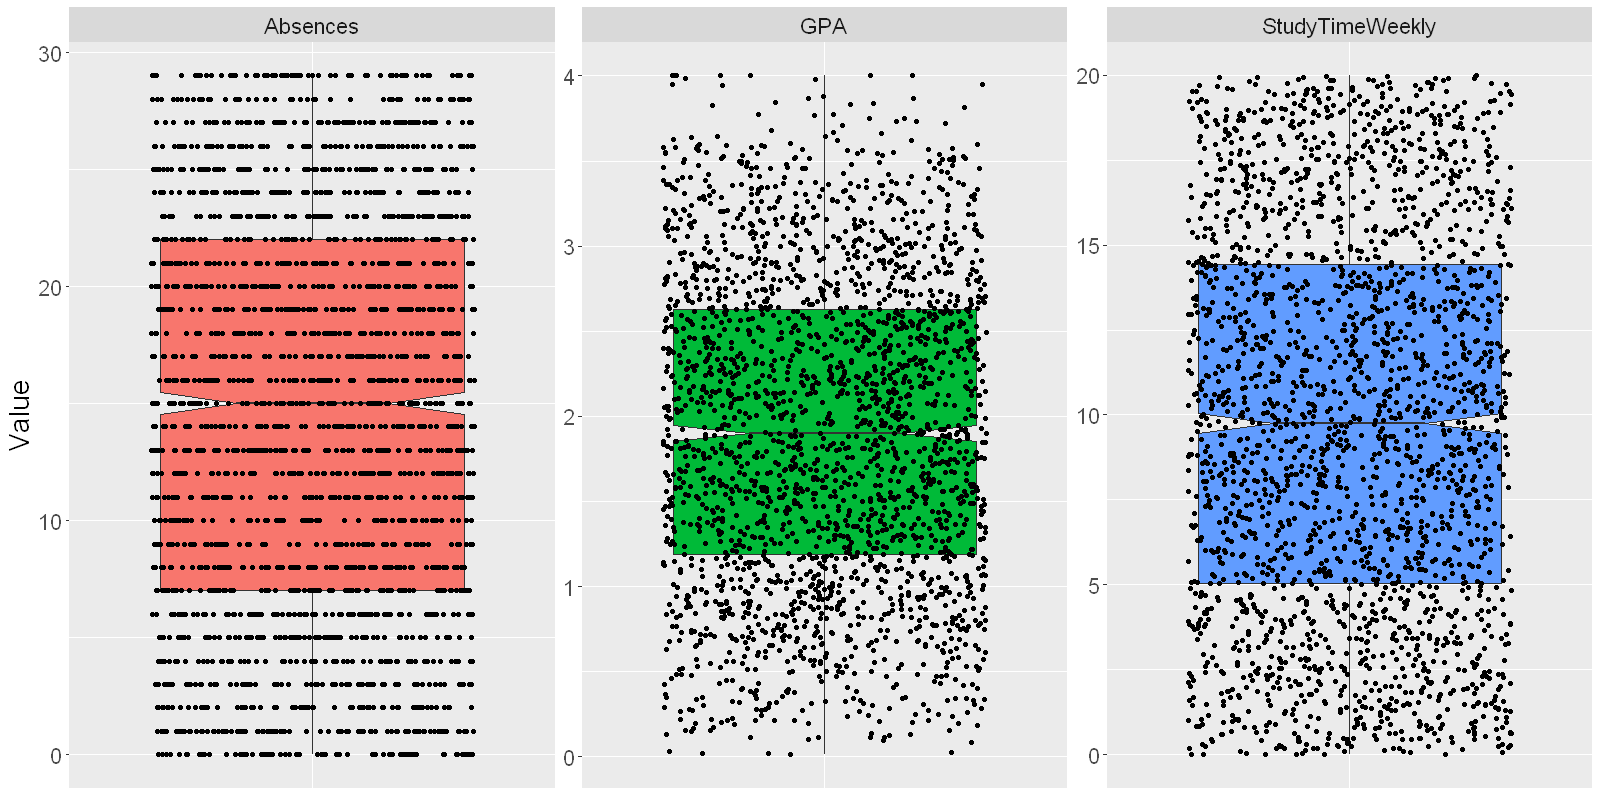

In [12]:
# Adjust the figure size
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 100)

# Print out the boxplot for each numeric columns
# Add jitter to see the spread of the datapoints
ggplot(df_long_num, aes(x = Variable, y = Value, fill = Variable)) +
    geom_boxplot(notch = TRUE) +
    geom_jitter() +
    facet_wrap(~ Variable, nrow = 1, scales = 'free') +
    guides(fill = 'none') +
    theme(text = element_text(size = 20),
        axis.title.x = element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

**Observations:**
- There are **no outliers** in all three columns.
- In the `Absences` and `StudyTimeWeekly` columns, **the values are evenly spread out** accross their ranges. This indicates that the number of absences and the amount of time students spend studying each week **vary significantly** between students, signifying **a large variance**. (Note that `Absences`is actually an integer column, so the values will have an interval of 1)
- Interestingly, in the `GPA` column, the values are almost evenly spread out, with the **values near 0 and 4.0 becoming less dense**. This observation aligns with the common belief that it is difficult to get a perfect grade (GPA of 4.0), and the probability of getting a very poor grade (near 0) is also low. Therefore, it is typical for students to receive grades around the middle range.
- Even though the boxplots look **symmetrical**, because the data points are **evenly spread out** and **not gathered around the center**, this means that the columns **might not follow a normal distribution**. This will become clear after we see the histograms and QQ plots.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


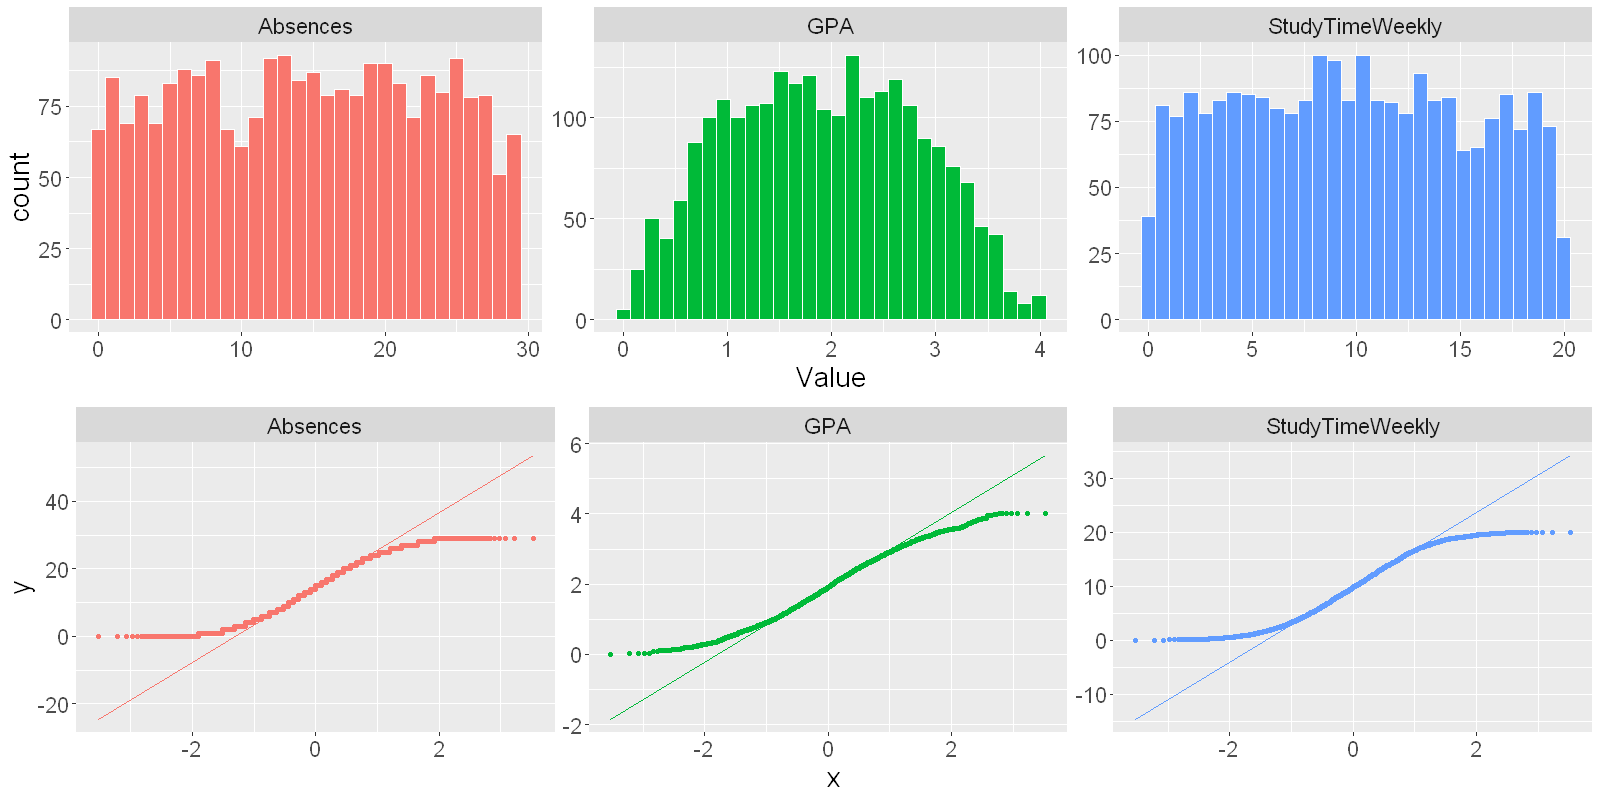

In [13]:
# Print out the histogram for each numerical column
hist <- ggplot(df_long_num, aes(x = Value, fill = Variable)) +
    geom_histogram(color = 'white') +
    facet_wrap(~ Variable, nrow = 1, scales = 'free') +
    guides(fill = 'none') +
    theme(text = element_text(size = 20))

# Print out the QQ plot for each numerical column
qq <- ggplot(df_long_num, aes(sample = Value, color = Variable)) +
    geom_qq() +
    stat_qq() +
    stat_qq_line() +
    facet_wrap(~ Variable, nrow = 1, scales = 'free') +
    guides(color = 'none') +
    theme(text = element_text(size = 20))
        
# Arrange the resulting plots into a grid
grid.arrange(hist, qq)

**Observations:**
- From the shape of the histograms and the QQ plot, the `Absences` and `StudyTimeWeekly` columns **do not follow a normal distribution**, instead, it might follow **a uniform distribution**.
- In contrast, the `GPA` column **might follow a normal distribution** as it is **not skewed** and **the peak is relatively platykurtic**. However, to make sure of this, let's check the skewness and kurtosis coefficient of `GPA`.

In [14]:
skewness(df$GPA)
kurtosis(df$GPA)

[1] 0.03557414

[1] 2.115371

**Observations:**
- From the above calculation it be seen that the **skewness coefficient is near zero** and the **kurtosis coefficient is near 3**. Therefore, it can concluded that the `GPA` column **follows a normal distribution**.
- This aligns with the common belief mentioned previously that **typically students will get grades around the middle range**, and it is difficult to obtain grades near perfect (4.0) or zero.

#### 2.2.2. Exploring the Categorical Columns

To explore the categorical columns, first we can simply just make a **bar chart** to see the distribution of our labels, which is the `GoodGrades` column.

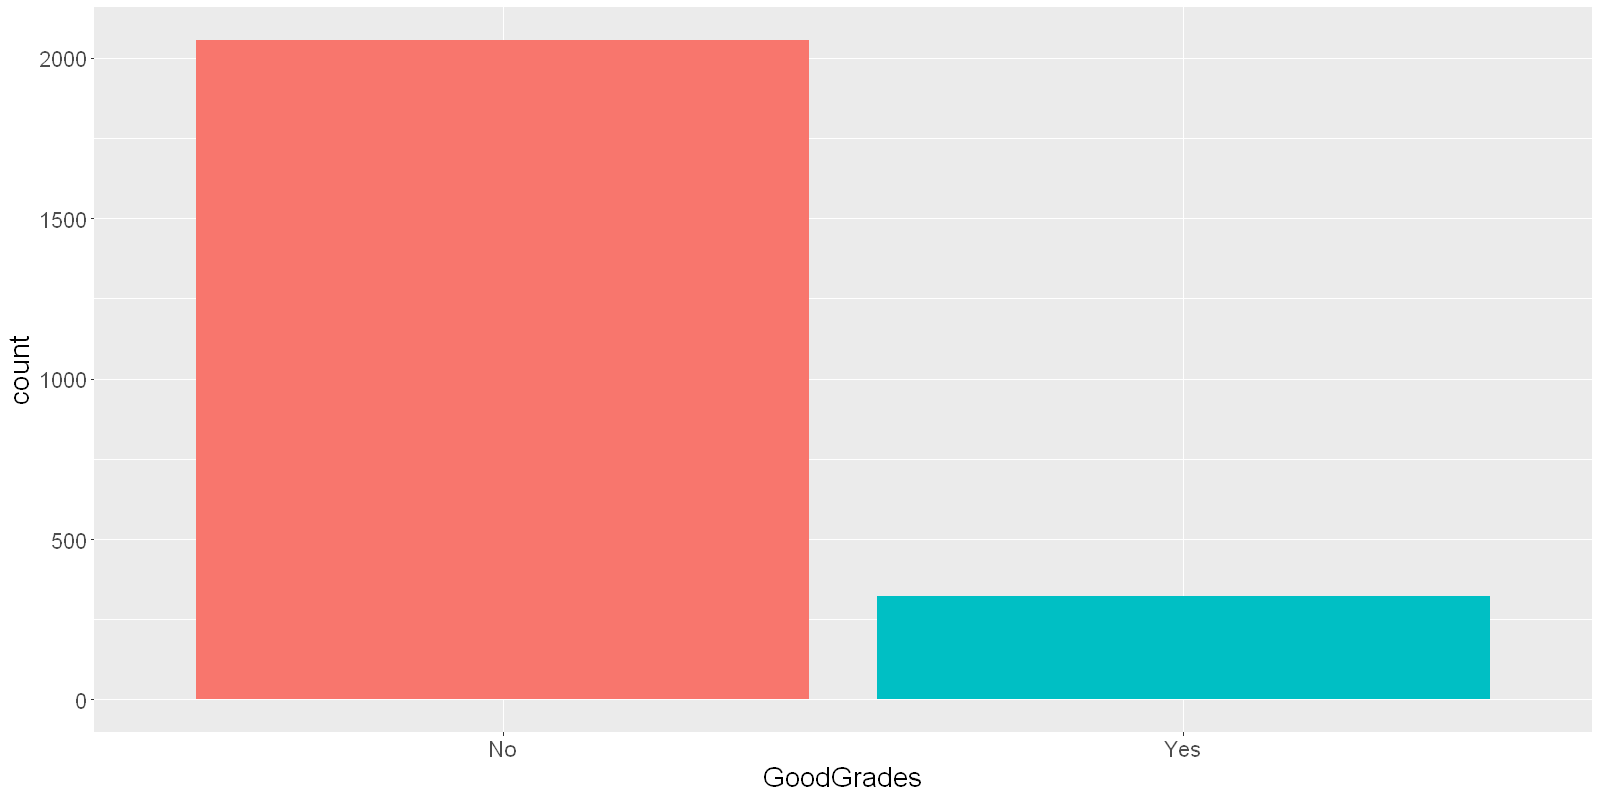

In [15]:
# Print out a bar chart to compare the number of labels
ggplot(df, aes(x = GoodGrades, fill = GoodGrades)) +
    geom_bar() +
    guides(fill = 'none') +
    theme(text = element_text(size = 20))

From the bar chart above, it is evident that **there is a class imbalance problem in the labels**. Therefore, it is important to apply proper techniques, such as **under-sampling or over-sampling**, when creating the model to **avoid creating a "lazy model"** that predict everything to the majority class.

Next, to explore more on the categorical columns, let's collect all the categorical columns using `pivot_longer()` to change the dataframe into a long format.

In [16]:
# Gather the categorical columns into a long dataframe format
df_long_cat <- df %>% 
    pivot_longer(cols = c('Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'),
                names_to = 'Category', values_to = 'Value')

# Check the resulting long dataframe
head(df_long_cat)

StudentID,StudyTimeWeekly,Absences,GPA,GoodGrades,Category,Value
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>
1001,19.83372,7,2.929196,No,Tutoring,Yes
1001,19.83372,7,2.929196,No,ParentalSupport,Moderate
1001,19.83372,7,2.929196,No,Extracurricular,No
1001,19.83372,7,2.929196,No,Sports,No
1001,19.83372,7,2.929196,No,Music,Yes
1001,19.83372,7,2.929196,No,Volunteering,No


To explore the categorical data, we can do these following steps:
- **`Tutoring`:** create a **pie chart** to compare the number of students who have a tutor and those who do not. This will provide a clear visualisation of the **distribution** between those two groups.
- **`ParentalSupport`:** use a **bar chart** to display the count of students that fall in each category of parental involvement level, which will also show the distribution.
- **Extracurricular activites:** For the **`Extracurricular`**, **`Sports`**, **`Music`**, and **`Volunteering`** columns, make **individual pie charts** for each category. These charts can be used to compare the number of students participating in each activity against those who do not. This can provide an insight on the **level of student engagement in various extracurricular activities**, such as which activity is popular and which is not.

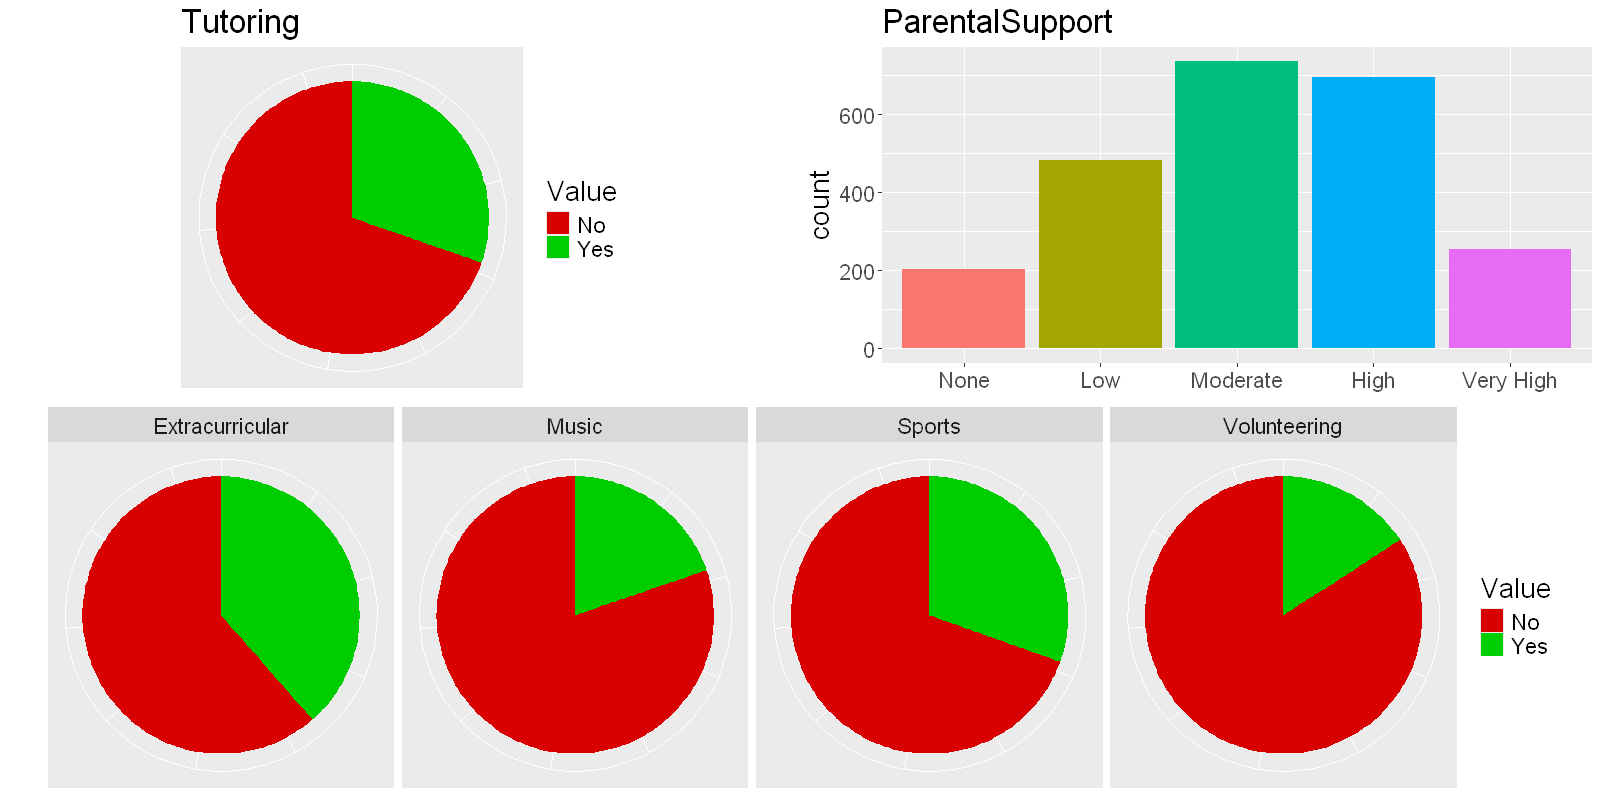

In [17]:
# Create a pie chart for the `Tutoring` column to compare the categories
tutoring <- df_long_cat %>%
    filter(Category == 'Tutoring') %>%
    ggplot(aes(x = factor(1), fill = Value)) +
        geom_bar() +
        coord_polar(theta = 'y') +
        scale_fill_manual(values = c('#d80000', '#00cd00')) +
        labs(title = 'Tutoring') +
        theme(text = element_text(size = 20),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank())

# Create a pie chart for the `ParentalSuppor` column to compare the categories
parents <- df_long_cat %>%
    filter(Category == 'ParentalSupport') %>%
    ggplot(aes(x = Value, fill = Value)) +
        geom_bar() +
        labs(title = 'ParentalSupport') +
        guides(fill = 'none') +
        theme(text = element_text(size = 20),
              axis.title.x = element_blank())

# Create several pie charts for the activities columns to compare the categories in each activity
activities <- df_long_cat %>%
    filter(Category %in% c('Extracurricular', 'Sports', 'Music', 'Volunteering')) %>%
    ggplot(aes(x = factor(1), fill = Value)) +
        geom_bar() +
        coord_polar(theta = 'y') +
        scale_fill_manual(values = c('#d80000', '#00cd00')) +
        facet_wrap(~ Category, nrow = 1) +
        theme(text = element_text(size = 20),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              axis.text.x=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank())

# Arrange the created charts into a grid
grid.arrange(tutoring, parents, activities, ncol = 2, layout_matrix= rbind(c(1,2), 3))

**Observations:**
- From the first pie chart, it is apparent that most students **do not have a tutor**. This might related to the fact that **hiring a tutor is costly**, thus they prefer to study alone.
- Regarding the parental involvement, it appears that most parents have **a moderate to high level of engagement** in their children's studies, while both the "no involvement" and "very high involvement" levels are less common. This suggests that the majority of parents are somewhat actually involved, with the **extreme levels of involvement are relatively rare**.
- For the extracurricular activites, most students **do not participate in them**. However, it is important to note that a student might **only engage in only one or two type** of activity, such as sports but not music. Therefore, **further exploration is needed** to understand the amount of students involvent in extracurricular activities.
- In addition, it is clear that **regular school extracurricular activity is the most popular** among the students, followed by sports, then music, and lastly volunteering.

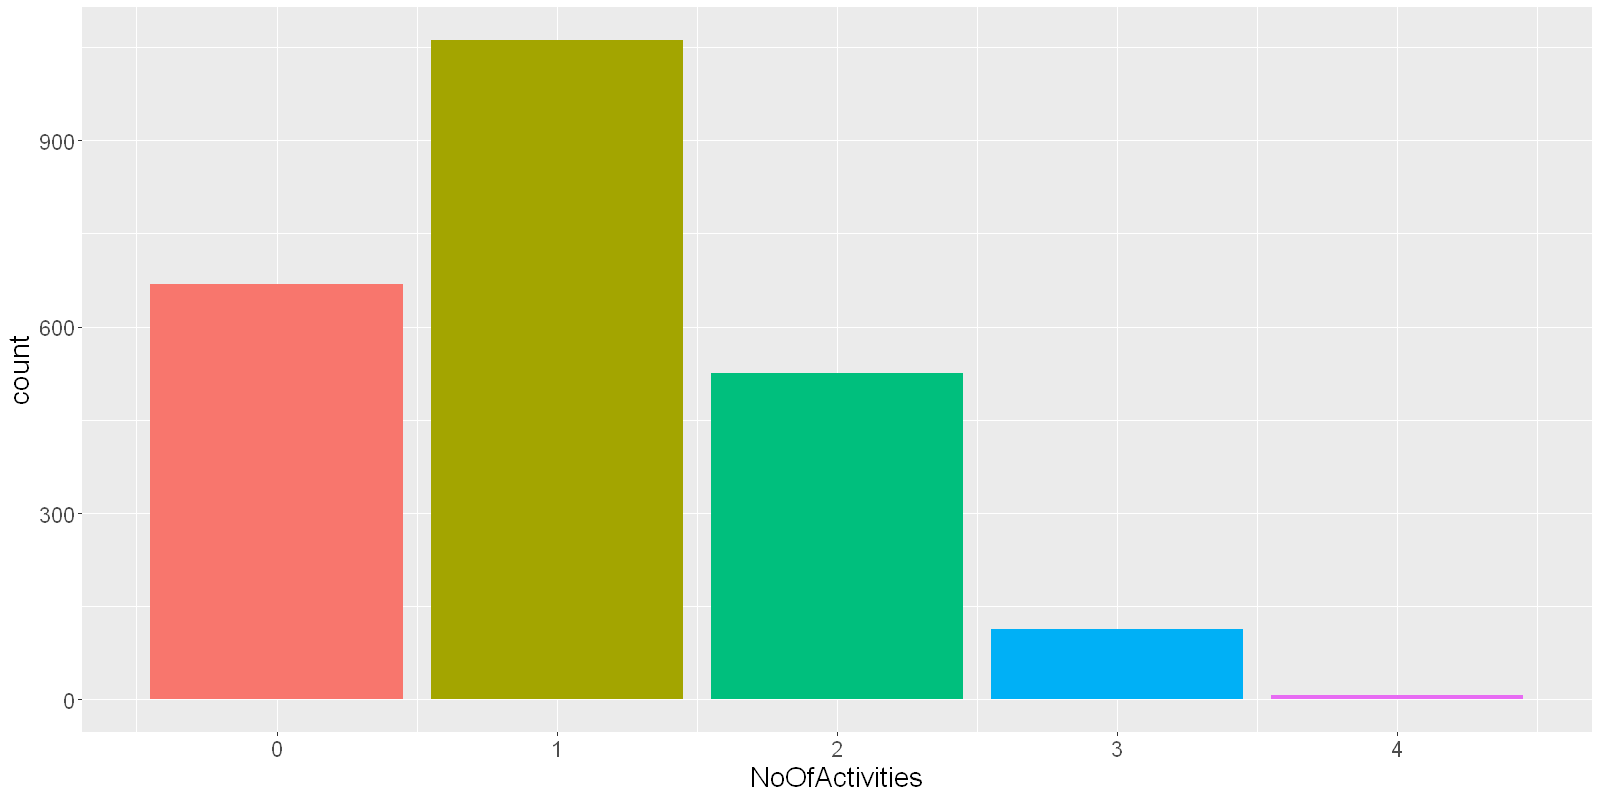

In [18]:
# Count the number of activities a particular student is participating
# Then, create a bar chart to compare the counts for each possible number of activities
df_long_cat %>% 
    filter(Category != 'Tutoring') %>%
    group_by(StudentID) %>%
    summarize(NoOfActivities = sum(Value == 'Yes')) %>%
    ggplot(aes(x = NoOfActivities, fill = factor(NoOfActivities))) +
        geom_bar() +
        guides(fill = 'none') +
        theme(text = element_text(size = 20))

**Observations:**
- From the above bar chart, it is clear that students typically **only take part in no more than two activities**, with **most of them participating in only one activity**.
- It is also apparent that students engaging in **more than 2 activities are very rare**. This might be because **managing multiple activities** without compromising other responsibilities is **difficult** due to **their limited time**.

The variable `NoOfActivities` looks promising, as it could provide valuable insights for the model. Therefore, it would be good to add this as an additional feature to our original dataframe.

In [19]:
# Count the number of activities a student is participating
# And add them to the original dataset
df <- df %>%
    mutate(NoOfActivities = rowSums(.[c('Extracurricular', 'Sports', 'Music', 'Volunteering')] == 'Yes')) %>%
    select(-GPA, -GoodGrades, GPA, GoodGrades)

# Re-check the dataset
head(df)

StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,NoOfActivities,GPA,GoodGrades
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1001,19.833723,7,Yes,Moderate,No,No,Yes,No,1,2.9291956,No
1002,15.408756,0,No,Low,No,No,No,No,0,3.0429148,Yes
1003,4.210570,26,No,Moderate,No,No,No,No,0,0.1126023,No
1004,10.028829,14,No,High,Yes,No,No,No,1,2.0542181,No
1005,4.672495,17,Yes,High,No,No,No,No,0,1.2880612,No
1006,8.191219,0,No,Low,Yes,No,No,No,1,3.0841836,Yes


### 2.3. Correlation Analysis

After exploring the distribution of the data, now, let's start to investigate the relationship between the variables. To start this analysis, we can simply employ the `pairs()` function to print out **all possible scatter plot between every columns** in the dataset.

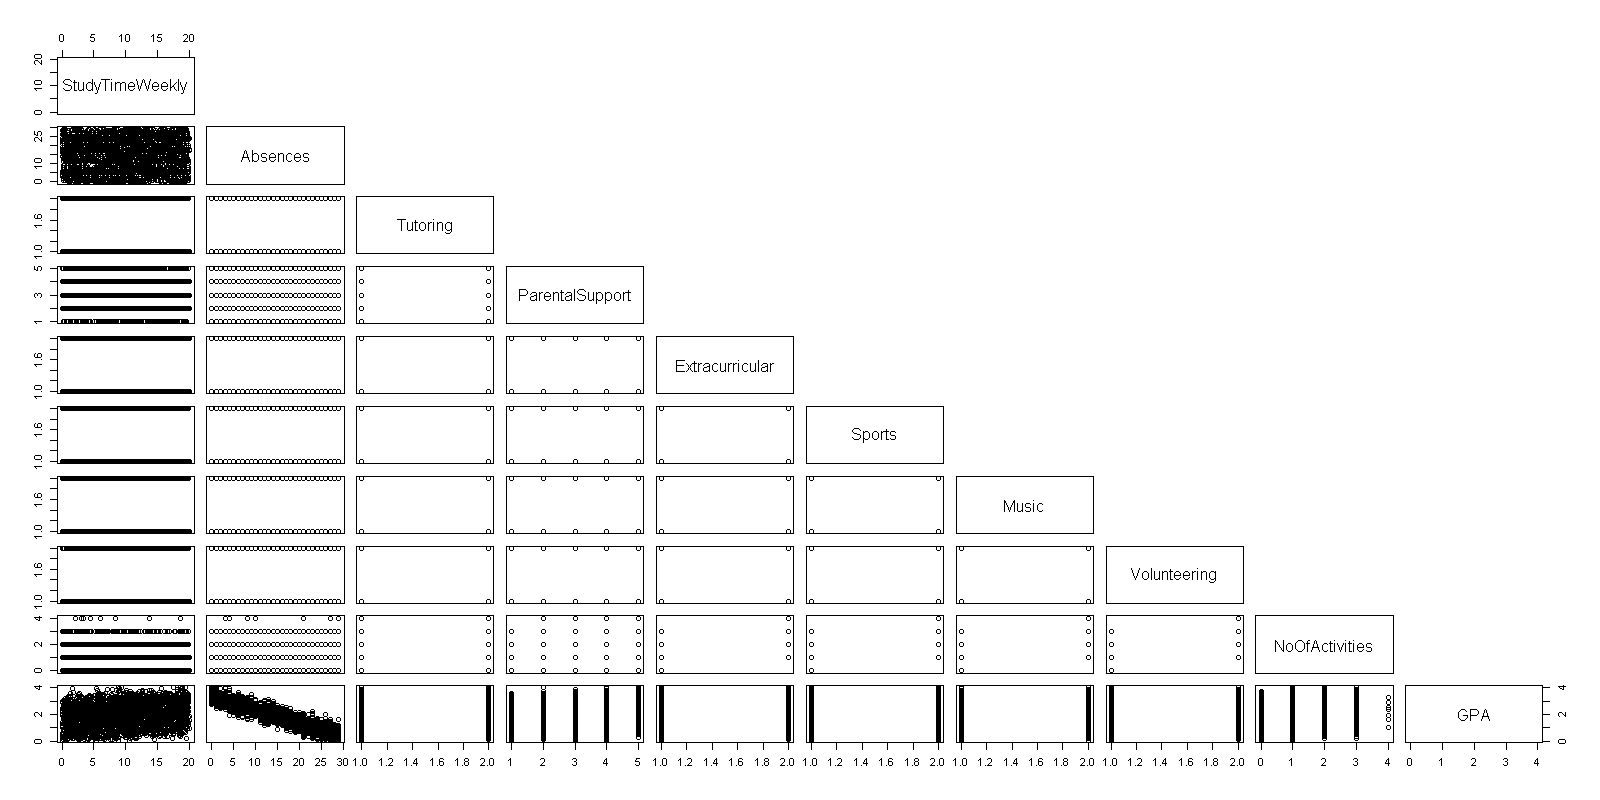

In [20]:
# Print out all scatter plots between every columns, except `StudentID` and `GoodGrades`
# `StudentID` because it is just a unique identifier, thus does not have any meaning for the analysis
# `GoodGrades` is already represented by the `GPA` column
df %>%
    select(-StudentID, -GoodGrades) %>%
    pairs(upper.panel = NULL, cex.labels = 1.5)

**Observations:**
- From the scatter plots above, at a glance, it is apparent that `Absences` and `GPA` have **a strong negative linear relationship**. This suggests that as the number of absences increases, their GPA tends to decrease significantly. This could indicate that **attendance is a crucial factor in a student's performance**.
- In contrast, `StudyTimeWeekly` and `GPA` have **a very weak positive linear relationship**. This suggests that the amount of time they spend studying in each week does not have a significant effect on their GPA. It could indicate that simply **increase their study time does not necessarily lead to a better academic performance**.
- It is also clear that `StudyTimeWeekly` and `Absences` **do not have any relationship**. This means that those two variables are **independent of each other**. In other words, students who are diligent in their studies do not necessarily have high attendance levels, and vice versa.
- However, for the relationships with the categorical variables and `NoOfActivities`, it is not clear from the scatter plots above, thus it is better to do further exploration.

Next, let's check the Pearson's correlation coefficient. To make it possible to use the `cor()` function, convert the categorical variables to a numerical codes first. Then, we can input the resulting correlation matrix into the `corrplot()` function from the `corrplot` library to help with the visualisation.

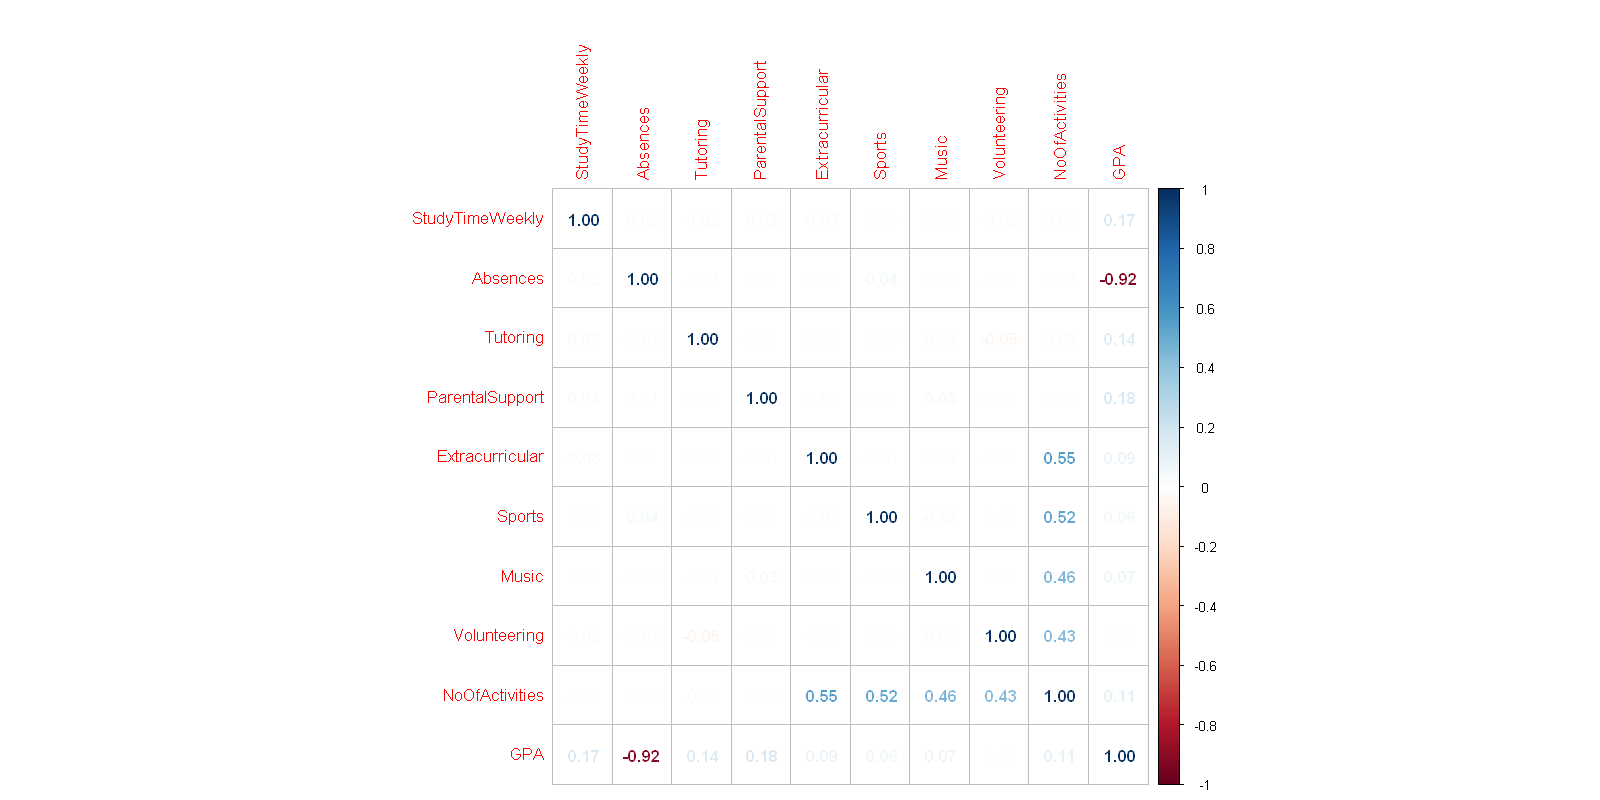

In [21]:
# Convert the categorical columns into numerical columns using encodings
# Calculate the Pearson's correlation coefficient
# Visualise the result to help identifying the important relationships
df %>%
    select(-StudentID, -GoodGrades) %>%
    mutate_at(c('Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering'), 
              function(x) case_when(x == 'Yes' ~ 1, .default = 0)) %>%
    mutate(ParentalSupport = case_when(ParentalSupport == 'None' ~ 0, ParentalSupport == 'Low' ~ 1,
                                              ParentalSupport == 'Moderate' ~ 2, ParentalSupport == 'High' ~ 3,
                                              ParentalSupport == 'Very High' ~ 4)) %>%
    cor() %>%
    corrplot(method = 'number')

**Observations:**
- As mentioned previously, **`GPA`** has **a very strong negative relationship with `Absencences`**, but **the relationship with `StudyTimeWeekly` is actually very weak**, only 0.17.
- Other than that, the only noticeable relationship are `Extracurricular`, `Sports`, `Music`, and `Volunteering` with `NoOfActivities`. Please note that **`NoOfActivities` column is actually dependent on those four columns**. Therefore, for the model, we need to only pick one between `NoOfActivities` or the other four columns (we can try both options later).

To conduct a more in-depth analysis on the relationship between the categorical columns and the target columns (both `GPA` and `GoodGrades`), we can use these following methods:
- Create **boxplots** to show the distribution of `GPA` accross different categories for each column. This will help us to see whether there are any significant differences in GPA based on several categorical avriables, such as extracurricular activities participation or parental involvement level.
- Make **proportional bar charts** to compare the number of students achieving good grades with those who do not accross each catergory in each column. This can help us to see how categorical variables influence the likelihood of obtaining a good grade.

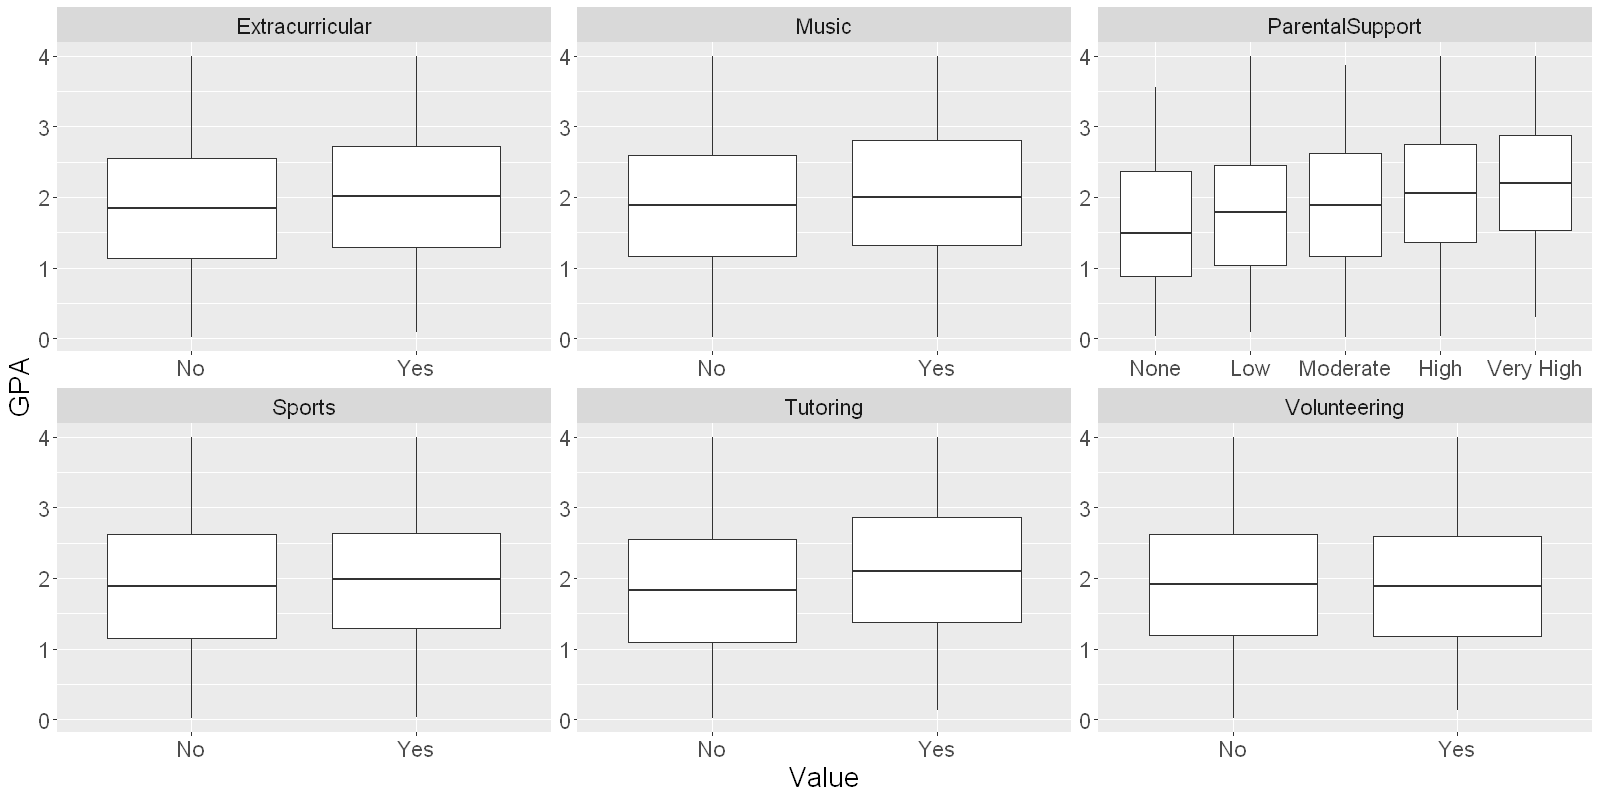

In [22]:
# Print out boxplots to see the spread of the GPA in each category of the categorical columns
ggplot(df_long_cat, aes(x = Value, y = GPA)) +
    geom_boxplot() +
    facet_wrap(~ Category, scales = 'free') +
    theme(text = element_text(size = 20))

**Observations:**
- For the `ParentalSupport` column, it is apparent that **`GPA` increases as the parent's involvement level rises**. This indicates that parental support may boost a child's motivation to study, leading to a better academic performance. Interestingly, **the gap between the `None` and `Low` categories is larger** than the difference between the other categories. This might suggest that when parents **show no interest in their child's education**, the student may also **lack any motivation** to achieve better grades.
- Additionally, it is also clear that a student's academic performance tends to be **higher if they have a tutor** to help them with their studies. This suggests that **tutoring provides valuable support** to assist students to understand the lesson better, thus obtaining better grades.
- Lastly, for the extracurricular activities, except `Volunteering`, it is evident that **participating in those activities may increase their grades slightly**. This suggests that students who engage in extracurricular activities, may experience a slight increase in their academic performance. This is **contrary to the common belief** that more activities means reduced time to study and may negatively impact their grades.
- In contrast, it is interesting that in the `Volunteering` column, **the `GPA` distributions are nearly identical, regardless of whether they are volunteering or not**. This suggests that while most extracurricular activities may have a positive impact on a student's academic performance, volunteering does not appear to have any influence.

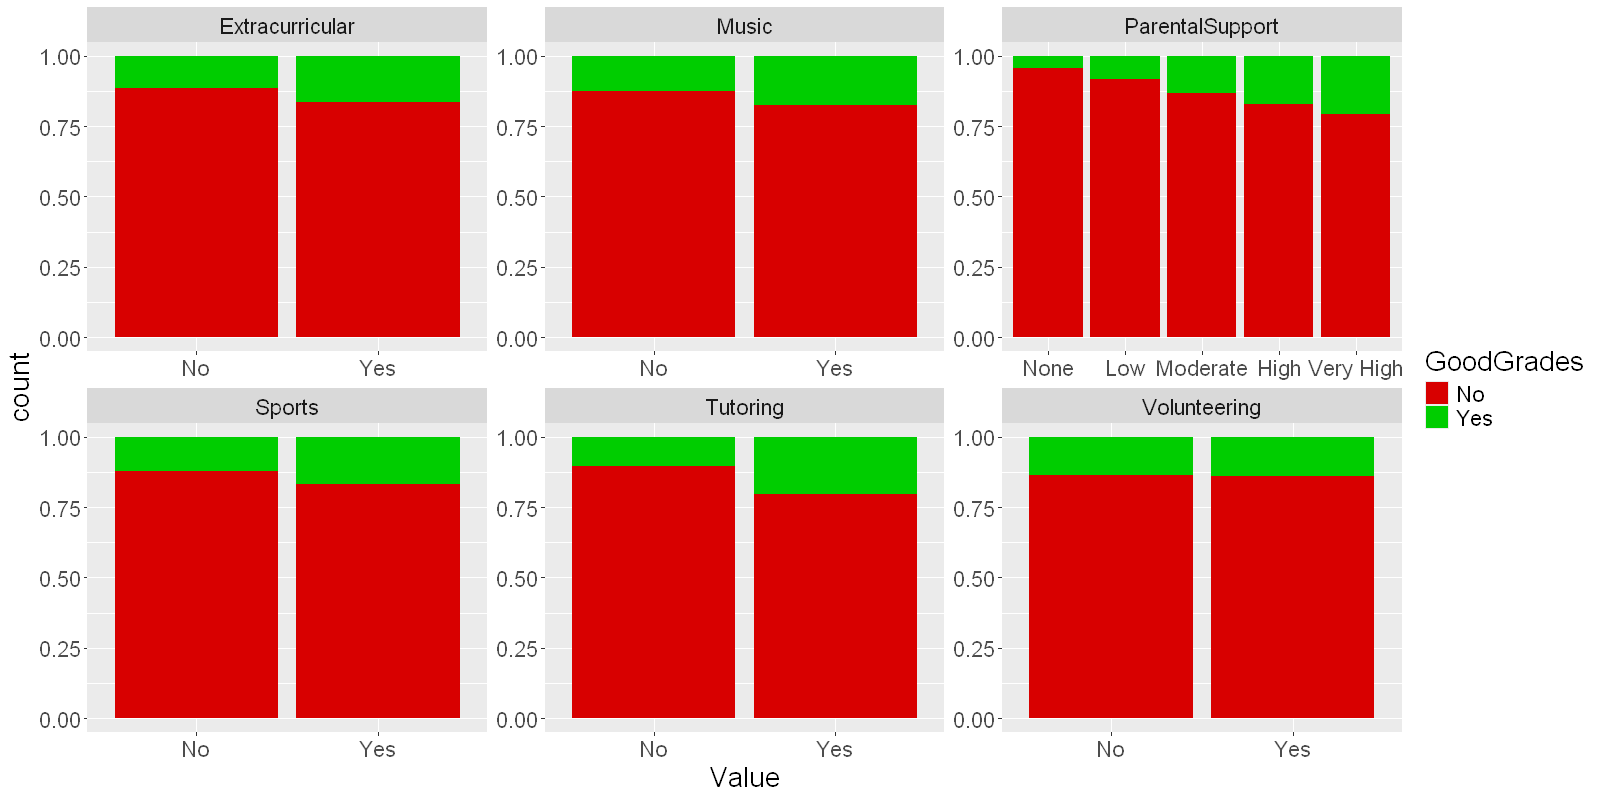

In [23]:
# Print put the proportional bar charts to see 
# the percentage of students that have good grades in each category
ggplot(df_long_cat, aes(x = Value, fill = GoodGrades)) +
    geom_bar(position = position_fill(reverse = TRUE)) +
    scale_fill_manual(values = c('#d80000', '#00cd00')) +
    facet_wrap(~ Category, scales = 'free') +
    theme(text = element_text(size = 20))

**Observations:**
- From the proportional barcharts above, the insights that we get are the align with those gained in the previous section.
- Notably, **nearly 25% of the students who have a tutor achieve good grades**, compared to the students who do not, only less than 10% that have good grades.
- For the extracurricular activities columns, the percentage differences of students having good grades are **not significant, regardless of their participation**, with the `Volunteering` column also have the nearly the same percentage.
- Lastly, from the `ParentalSupport` column, the percentage of students achieving good grades **increases as the involvement level of the parents rises**, with for the `Very High` category approaching a 25%.

From the above investigations, it is clear that regarding the students' participation in **volunteering is not significant** enough to affect whether the students will have good grades or not. Therefore, we can **remove the `Volunteering` column** from our dataframe. In addition, we also need to substracte the `NoOfActivities` column by one if the student is volunteering.

In [24]:
# Substract the number of activities by one if the student is volunteering
# Then, remove the `Volunteering` column
df <- df %>%
    mutate(NoOfActivities = ifelse(Volunteering == 'Yes', NoOfActivities - 1, NoOfActivities)) %>%
    select(-Volunteering)

# Re-check the dataset
head(df)

StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,NoOfActivities,GPA,GoodGrades
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1001,19.833723,7,Yes,Moderate,No,No,Yes,1,2.9291956,No
1002,15.408756,0,No,Low,No,No,No,0,3.0429148,Yes
1003,4.210570,26,No,Moderate,No,No,No,0,0.1126023,No
1004,10.028829,14,No,High,Yes,No,No,1,2.0542181,No
1005,4.672495,17,Yes,High,No,No,No,0,1.2880612,No
1006,8.191219,0,No,Low,Yes,No,No,1,3.0841836,Yes


For the `NoOfActivities` column, we can also implement what we have done on the categorical columns.

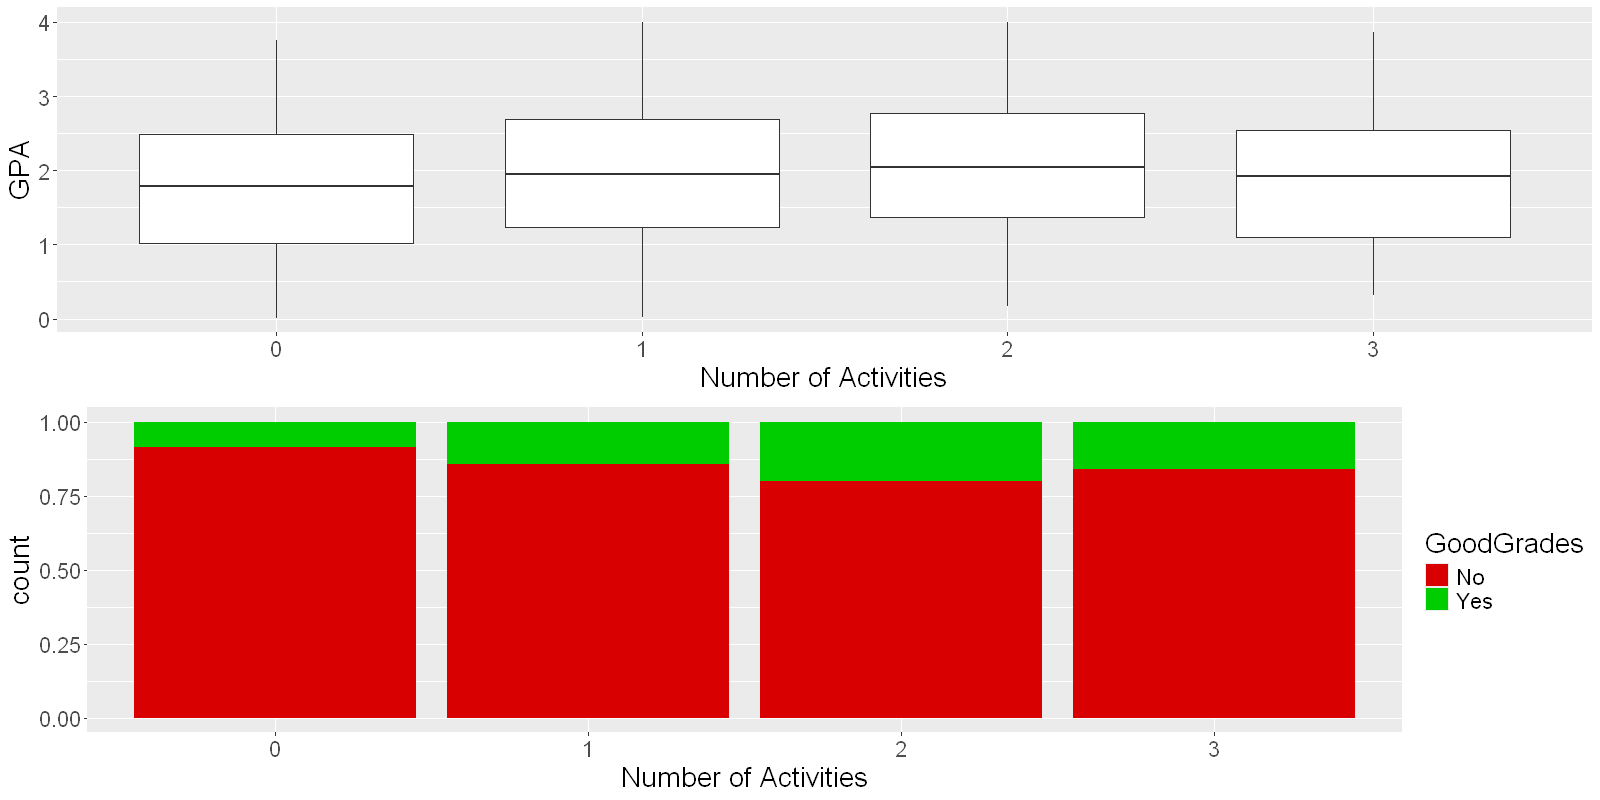

In [25]:
# Print out boxplots to see the GPA spread for each number of activities
boxplot <- ggplot(df, aes(x = factor(NoOfActivities), y = GPA)) +
    geom_boxplot() +
    labs(x = 'Number of Activities') +
    theme(text = element_text(size = 20))

# Print out proportional bar charts to see
# the percentage of students having good grades for each number of activties
bar <- ggplot(df, aes(x = factor(NoOfActivities), fill = GoodGrades)) +
    geom_bar(position = position_fill(reverse = TRUE)) +
    scale_fill_manual(values = c('#d80000', '#00cd00')) +
    labs(x = 'Number of Activities') +
    theme(text = element_text(size = 20))

# Arrange the resulting plots using a grid
grid.arrange(boxplot, bar)

**Observations:**
- From the charts above, it can be seen that students academic performance **improves as their number of activities increase**, with the **peak at two activities**.
- However, when students participate in **three activties**, their **performance drops**. This decline might happen because **managing three activities becomes overwhelming**, leaving them less time to focus on their studies.
- Therefore, it can be concluded that the **optimal number of extracurricular activities** students can join is **two**, which can balance the benefits of participation without neglecting their studies.

----

## 3. Methodology<a class="anchor" id="sec_4"></a>

After exploring the data in the previous section, we can start to design the model. In this section, we will outline the approach for building the models. The primary objective of this study is to create a machine learning model than **can predict whether a student will achieve good grades (GPA $\geq$ 3.0)** using the available predictors. The taget label for this prediction is represented by the `GoodGrades` column. The predictors that we plan to use include:
- **Students' study habit:** `StudyTimeWeekly`, `Absences`, and `Tutoring`.
- **Parental involvement:** `ParentalSupport`.
- **Extracurricular activities:** `Extracurricular`, `Sports`, `Music`, and `NoOfActivities`.

In addition, for the **extracurricular activities** predictors, we will explore **three different approaches**:
1. Using `Extracurricular`, `Sports`, and `Music`columns **as individual independent predictors**.
2. **Add interactions terms** between these three columns to capture any combined effects.
3. Using the **`NofOfActivties` column** as a single predictor, instead of dividing it by the type of activities.

For the machine learning model type, we will consider **three linear classification models:**
- **Logistic Regression**
- **Linear Discriminant Analysis (LDA)**
- **Quadratic Discriminant Analysis (QDA)**

Given we have three approaches for handling the extracurricular activties predictors and the three types of models, we will **create a total of nine models** (3 approaches for 3 model types).

For evaluating the performance of the models created, we will use **five key classification metrics:**
- **Accuracy:** measures how often the model correctly predicts the labels.
- **Precision:** the proportion of the predicted positive labels ("Yes") that are actually correct.
- **Recall:** the proportion of actual positive labels that the model successfully identifies.
- **F1 Score:** the harmonic mean of precision an recall, balancing both metrics.
- **AUC-ROC curve:** evaluates the model's ability to distinguish between the two classes.

Finally, for the **inference task**, we will use the best-performing model to **identify which predictors have the most significant impact on the target variable**. This can provide insights into identifying the key factors that influence students' academic performance.

----

## 4. Model Development <a class="anchor" id="sec_5"></a>

In this section, we will start to develop the classification models. Here, we will start with preparring the dataset first before using it for the training. Then, after the preparation we can begin building the models. After that, we will also create a custom function to calculate and print out the evaluation metrics for testing the performance of the created models.

### 4.1. Data Preparation

Before building the models, it is important to address a key issue identified in the EDA section, which is **the class imbalance problem**. Specifically, the dataset has **significantly fewer positive labels compared to the negative labels**. This imbalance may lead to the problem of creating a "lazy model" that predict everything to the majority class, in this class the negative label. To prevent this, we need to do proper data manipulation tehcniques to solve this class imbalance problem.

Common techniques include **under-sampling** (randomly sample the majority class) or **over-sampling** (randomly duplicate observations of the minority class). However, both methods also come with drawbacks. Under-sampling can result in losing valuable training data, potentially reducing model accuracy. On the other hand, over-sampling can lead to overfitting due to repeatedly learning from the same examples. 

To address these shortcomings, we can instead use **SMOTE (Synthetic Minority Over-sampling Technique)**. The SMOTE algorithm generates a new synthetic example in the feature space by taking the difference between a sample with its nearest neighbour, multiplying the difference by a random number between 0 and 1, then adding the difference to the sample.

However, the standard SMOTE algorith can only work with continuous variables as the inputs. Given that our dataset includes several categorical variables, we need to use a modified version called **SMOTE-NC (SMOTE for Nominal and Continuous data)**. SMOTE-NC can handle categorical variables by using the most common category along neighbors.

In R, we can use simply use the `smotenc()` function from the `themis` library to implement this technique.

However, in common practice, the dataset is typically **split into a training and a test sets first** before applying SMOTE **to prevent data leakage**. If it is applied before splitting, there is a risk that **a synthetic observation or its original counterpart appear in both the training and test sets**. This would **defeat the purpose of splitting** the dataset as the test set would not accurately represent the unseen data, potentially leading to an overestimated model performance. Therefore, to prevent this problem, SMOTE should be **applied only to the training set** after the data has been split.

In R, we can simply use the `createDataPartition()` function from the `caret` library to implement the splitting technique. In this study, we will use **a split ratio 7:3**.

In addition, as we will also not going to use the `StudentID` and `GPA` columns for the model development, we can also delete those two columns.

In [26]:
# Remove the `StudentID` and `GPA` columns as they will not be used to create the model
df <- df %>%
    select(-StudentID, -GPA)

# Set seed for the random number generator (RNG)
set.seed(79)

# Split the datset into a training and test sets
# Use stratified sampling on the target variables
# Use splitting ration 0f 70% training and 30% test
sample <- createDataPartition(df$GoodGrades, p = 0.7, list = FALSE)
train  <- df[sample, ]
test   <- df[-sample, ]

# Check the train and test set
str(train)
str(test)

tibble [1,664 × 9] (S3: tbl_df/tbl/data.frame)
 $ StudyTimeWeekly: num [1:1664] 19.83 15.41 4.67 18.44 11.85 ...
 $ Absences       : num [1:1664] 7 0 17 0 11 15 21 21 17 9 ...
 $ Tutoring       : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 2 1 ...
 $ ParentalSupport: Factor w/ 5 levels "None","Low","Moderate",..: 3 2 4 4 2 3 4 5 1 3 ...
 $ Extracurricular: Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 2 1 1 1 ...
 $ Sports         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 2 1 ...
 $ Music          : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ NoOfActivities : num [1:1664] 1 0 0 1 0 0 1 1 1 1 ...
 $ GoodGrades     : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 1 1 1 1 1 ...
tibble [712 × 9] (S3: tbl_df/tbl/data.frame)
 $ StudyTimeWeekly: num [1:712] 4.21 10.03 8.19 15.6 15.42 ...
 $ Absences       : num [1:712] 26 14 0 10 22 1 9 14 16 29 ...
 $ Tutoring       : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 2 1 2 1 ...
 $ ParentalSupport: Factor w/ 5 levels "None","Low","Mo

In [27]:
# Appy the SMOTE-NC on the training set
train <- train %>%
    select(-NoOfActivities) %>%
    smotenc(var = 'GoodGrades', k = 5) %>%
    mutate(NoOfActivities = rowSums(.[c('Extracurricular', 'Sports', 'Music')] == 'Yes')) %>%
    select(-GoodGrades, GoodGrades)

# Re-check on the training set
head(train)

# Check the labels in the target varible of the training set
summary(train$GoodGrades)

StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,NoOfActivities,GoodGrades
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
19.833723,7,Yes,Moderate,No,No,Yes,1,No
15.408756,0,No,Low,No,No,No,0,Yes
4.672495,17,Yes,High,No,No,No,0,No
18.444466,0,No,High,Yes,No,No,1,Yes
11.851364,11,No,Low,No,No,No,0,No
7.598486,15,No,Moderate,No,No,No,0,No


No  Yes 
1439 1439

### 4.2. Training the Models

After the data has been prepared, we can start to train the models now to estimate the parameters.

#### 4.2.1. Logistic Regression

Logistic Regression is **similar to Linear Regression** but instead of modeling the response directly, it **models the probability** that an observation belongs to a particular class, typically the positive label. Unlike Linear Regression that can ouputs predictions that fall outside 0 to 1, Logistic Regression ensures that the ouputs are constrained within 0 and 1 through the useage of **logistic function**. 

The logistic function is defined as:
$$
p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

Here, $p(X)$ represents the probability of the observation belongs to the positive class given the predictor $X$ and parameters $\beta_0,\beta1$, which are estimated to best fit the data. To fit the model, we can employ the **maximum likelihood** estimation method, which will find the parameters that can maximize the likelihood of the observed outcomes. 

In R, the Logistic Regression model can be fitetd using the `glm()` function, with specifying `family = binomial` to indicate that the model is for a binary classification case.

In [28]:
# Train the first Logistic Regression model
# (use the activities as individual predictors)
log1 <- glm(GoodGrades ~ . -NoOfActivities, data = train, family = binomial(link = 'logit'))

# Train the second Logistic Regression model
# (add interaction terms)
log2 <- glm(GoodGrades ~ . -NoOfActivities + Extracurricular*Sports*Music, data = train, family = binomial(link = 'logit'))

# Train the third Logistic Regression model
# (use the number of activities instead)
log3 <- glm(GoodGrades ~ . -Extracurricular -Sports -Music, data = train, family = binomial(link = 'logit'))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


#### 4.2.2. Linear Discriminant Analysis (LDA)

In Logistic Regression, we directly model the conditional distribution of the response variable $Y$ given the predictor(s) $X$, which is represented as $P(Y=k|X=x)$. This approach is called a **discriminative model**. In contrast, in a **generative model**, such as Discriminant Analysis, we model the distribution of the predictors $X$ separately within each class and then apply the Bayes' theorem to estimate the $Pr(Y=k|X=x)$.

The posterior probability can be expressed as:
$$
P(Y=k|X=x)=\frac{\pi_k\,f_k(x)}{\sum^K_{l=1}\pi_l\,f_l(x)}
$$
where $f_k(x)$ is the density for $X$ in class $k$ and $\pi_k$ is the prior probability for class $k$.

In Linear Discriminant Analysis (LDA), it is assumed that the distribution of the predictors within each class follows a **Gaussian distribution** (normal distribution), and that different classes share the a **common covariance matrix**. Given our models have more than one predictors, then the **discriminant function** can be formulated as:
$$
\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+log\,\pi_k
$$
where $x$ is the vector of predictors, $\Sigma$ is the shared covariance matric, $\mu_k$ is the mean evctor for class $k$, and $log\,\pi_k$ is the log of the prior probability for class $k$.

In R, to implement the LDA model, we can use the `lda` function from the `MASS` library.

In [29]:
# Train the first LDA model (use the activities as individual predictors)
lda1 <- lda(GoodGrades ~ . -NoOfActivities, data = train)

# Train the second LDA model (add interaction terms)
lda2 <- lda(GoodGrades ~ . -NoOfActivities + Extracurricular*Sports*Music, data = train)

# Train the third LDA model (use the number of activities instead)
lda3 <- lda(GoodGrades ~ . -Extracurricular -Sports -Music, data = train)

#### 4.2.3. Quadratic Discriminant Analysis (QDA)

**Quadratic Discriminant Analysis (QDA)** is similar to LDA in that both are generative models. However, unlike LDA that assumes all predictors share the same covariance matrix, QDA does not impose such constraint. Instead, QDA allows **each class to have its own covariance matrix**, which leads to a **more flexible model**. 

Therefore, the **discriminant function** for QDA can be formulated as:
$$
\delta_k(x)=-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-mu_k)-\frac{1}{2}log\,|\Sigma_k|+log\,\pi_k
$$
where $\Sigma_k$ is the covariance matrix of class $k$ instead of the shared covariance matrix and $|\Sigma_k|$ is the determinant of the covariance matrix for class $k$.

In R, to implement a QDA model, we can simply use the `qda` function from the `MASS` library.

In [30]:
# Train the first QDA model (use the activities as individual predictors)
qda1 <- qda(GoodGrades ~ . -NoOfActivities, data = train)

# Train the second QDA model (add interaction terms)
qda2 <- qda(GoodGrades ~ . -NoOfActivities + Extracurricular*Sports*Music, data = train)

# Train the third QDA model (use the number of activities instead)
qda3 <- qda(GoodGrades ~ . -Extracurricular -Sports -Music, data = train)

### 4.3. Creating a Custom Function to Evaluate the Models

After creating the models, we need evaluate these models' performance. As mentioned in the previous section, we will conside five metrics in the evaluation process.

**Notations:**
- TP (True Positive) = correctly predicted as positive when the actual label is also positive.
- FP (False Positive) = predicted as positive when the actual label is actually negative.
- TN (True Negative) = correctly predicted as negative when the actual label is also negative.
- FN (False Negative) = predicted as negative when the actual label is actually positive.

**Accuracy**
<br>
Accuracy is one of the **most basic evaluation metrics** for classification as it just simply measures how many predictions are actually correct out of all the predictions. 

The formula for Accuracy is:
$$
Accuracy=\frac{TP+TN}{TP+FP+TN+FN}
$$

**Precision**
<br>
Precision measures the correctly identified positive labels out of the predicted positive labels. This is **useful when the cost for False Positives is high**.

The formula for Precision is:
$$
Precision=\frac{TP}{TP+FP}
$$

**Recall**
<br>
In contrast with Precision, Recall measures the correctly identified positive labels out of the actual positive labels. Thus, this is **useful when the cost for False Negatives is high instead**.

The formula for Recall is:
$$
Recall = \frac{TP}{TP + FN}
$$

**F1 Score**
<br>
F1 Score is the **harmonic mean between Precision and Recall**. This is used when we want to balance both metrics, while also giving a better measurement on the incorrectly labeled data than the Accuracy metric.

The formula for F1 Score is:
$$
F1\,Score=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}
=2\times\frac{Precision\,\times\,Recall}{Precision+Recall}
$$

**AUC-ROC**
<br>
To visualise the performance of a classification problem, we can use the **AUC (Area Under the Curve) ROC (Receiver Operating Characteristics)**. ROC itself is a probability curve that is created by plotting the true positive rate (TPR) against the false positive rate (FPR), whereas AUC is the area under the ROC curve that represents the degreee of separability. The higher the AUC is, the better the model can distinguish between the positive and the negative labels.

The formulas for TPR and FPR are:
$$
TPR/Recall/Sensitivity=\frac{TP}{TP+FN}\\
Specifity=\frac{TN}{TN+FP}\\
FPR=1-Specifity=\frac{FP}{TN+FP}
$$

In [31]:
# Create a custom function to evaluate the models
# The inputs are the actual labels of the test set 
# and the probability of belonging to the positive class
# The outputs are the evaluation metrics
evaluation <- function(actual, probs, threshold = 0.5){
  cat('------------------------------------------------------------\n')
  cat('Performance statistics:\n')
  cat('\n')

  # Determine the prediction result based on the probability
  # If the probability is greater than 0.5, then the label is positive ("Yes")
  predicted <- factor(probs >= threshold, 
               levels = c(FALSE, TRUE),
               labels = c('No', 'Yes'))
  
  # Print out the confusion matrix
  cat('Confusion matrix:\n\n')
  cm <- table(predicted, actual)
  print(cm)
  cat('\n')

  # Print out the classification metrics
  cat('Accuracy  =', (cm[1,1] + cm[2,2])/(cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]), '\n')
  cat('Precision =', cm[2,2]/(cm[2,2] + cm[2,1]), '\n')
  cat('Recall    =', cm[2,2]/(cm[2,2] + cm[1,2]), '\n')
  cat('F1-score  =', cm[2,2]/(cm[2,2] + 0.5*(cm[2,1] + cm[1,2])), '\n')
  cat('\n')

  # Adjust the size of the plots
  options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)

  # Print out the ROC curve and the AUC score
  roc_curve <- roc(actual, probs)
  plot(roc_curve, main = 'ROC Curve')
  cat('AUC =', auc(roc_curve), '\n')
  cat("------------------------------------------------------------")
}

----

## 5. Results and Discussion <a class="anchor" id="sec_6"></a>

This section is divide into two parts:
- **Prediction Task**: analyse the performance of the resulting model using evaluation metrics on the test set. Then, compare the results to determine which model shows the best performance.
- **Inference Task**: examine the best model to identify which predictors have the most significant effect on the model's outcomes.

### 5.1. Prediction Task

Now, let's print out the resulting models summaries and the evaluation results one-by-one. Then, we can start the analysis and comparison at the end.

#### 5.1.1. Logistic Regression

##### 5.1.1.1. Model Summary

In [32]:
# Print out the summary of the first Logistic Regression model
summary(log1)


Call:
glm(formula = GoodGrades ~ . - NoOfActivities, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8873  -0.0012   0.0004   0.1100   2.5852  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -5.26639    0.70788  -7.440 1.01e-13 ***
StudyTimeWeekly           0.35483    0.02851  12.444  < 2e-16 ***
Absences                 -1.23416    0.07587 -16.266  < 2e-16 ***
TutoringYes               3.48961    0.30866  11.306  < 2e-16 ***
ParentalSupportLow        3.92751    0.63888   6.148 7.87e-10 ***
ParentalSupportModerate   5.17281    0.63464   8.151 3.62e-16 ***
ParentalSupportHigh       6.72567    0.67100  10.023  < 2e-16 ***
ParentalSupportVery High  8.09762    0.82385   9.829  < 2e-16 ***
ExtracurricularYes        1.74521    0.25880   6.744 1.55e-11 ***
SportsYes                 2.71709    0.31039   8.754  < 2e-16 ***
MusicYes                  1.66133    

**Observations:**
- All predictors exhibit a **significant effect** on the output (seen from their p-value), indicating their relevance in prediciting the target variable.
- Among the predictors, only `Absences` shows a **negative relationship** with the output. This aligns with the earlier analysis where higher absences number associated with lower academic performance.
- The median of the deviance residuals is close to zero, suggesting the model is **generally well-calibrated** and fits the data well.
- The **residual deviance is considerably smaller than the null deviance**. This suggests that the model perform ** significantly better than the null model** (a model with no predictors). This shows that using predictors can improve the model's performance.

In [33]:
# Print out the summary of the second Logistic Regression model
summary(log2)


Call:
glm(formula = GoodGrades ~ . - NoOfActivities + Extracurricular * 
    Sports * Music, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9420  -0.0012   0.0004   0.1103   2.5929  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -5.40107    0.74955  -7.206 5.77e-13 ***
StudyTimeWeekly                        0.35643    0.02912  12.242  < 2e-16 ***
Absences                              -1.24068    0.07663 -16.191  < 2e-16 ***
TutoringYes                            3.54318    0.31554  11.229  < 2e-16 ***
ParentalSupportLow                     3.95421    0.67147   5.889 3.89e-09 ***
ParentalSupportModerate                5.28305    0.65633   8.049 8.32e-16 ***
ParentalSupportHigh                    6.86200    0.69533   9.869  < 2e-16 ***
ParentalSupportVery High               8.39063    0.85058   9.865  < 2e-16 ***
ExtracurricularYe

**Observations:**
- Interestingly, none of the interaction between extracurricular activties show a significant effect, as their p-values are greater than 0.05, our designated threshold. This means that **the combination of activities does not significantly influence the outcome**.
- Among the predictors, other than `Absences`, only the interaction term `ExtracurricularYes:SportsYes` exhibits a **negative relationship** with the output. This suggests that participating in both regular extracurricular activities and sports could take up too much of the students' time, leading them to potentially neglect their studies.
- The median of the deviance residuals is also close to zero and the residual deviance is considerably smaller than the null deviance similar to the first model.
- Interestingly, the residual deviance is slightly lower than the first model. This might imply that the second model offers a **marginally better fit** than the first model.

In [34]:
# Print out the summary of the third Logistic Regression model
summary(log3)


Call:
glm(formula = GoodGrades ~ . - Extracurricular - Sports - Music, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6480  -0.0015   0.0005   0.1194   2.4898  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -5.33902    0.70256  -7.599 2.98e-14 ***
StudyTimeWeekly           0.34972    0.02780  12.581  < 2e-16 ***
Absences                 -1.20333    0.07275 -16.541  < 2e-16 ***
TutoringYes               3.38646    0.30008  11.285  < 2e-16 ***
ParentalSupportLow        4.01244    0.64089   6.261 3.83e-10 ***
ParentalSupportModerate   5.23961    0.63542   8.246  < 2e-16 ***
ParentalSupportHigh       6.69357    0.67134   9.970  < 2e-16 ***
ParentalSupportVery High  7.97953    0.81039   9.847  < 2e-16 ***
NoOfActivities            2.00787    0.18736  10.717  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion param

**Observations:**
- All predictors, including the aggregate `NoOfActivities`, demonstrate a **significant effect** on the output, indicating that the number of activities a student participates in can also significantly influence the academic performance. This suggest that whether we choose to include the activities as individual predictors or as an aggregate number of activities, **both approaches have meaningful impact** on the prediction.
- Among the predictors, other than `Absences`, there is no other predictors that have a negative relationship with the output.
- The median of the deviance residuals is also close to zero and the residual deviance is considerably smaller than the null deviance similar to the first model.
- Interestingly, the residual deviance is also slightly lower than both the first and second models. This suggests that the third model offers a **marginally better fit** than both the first and second ones.

##### 5.1.1.2. Evaluation Results

[1] "First Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  575   5
      Yes  41  91

Accuracy  = 0.9353933 
Precision = 0.6893939 
Recall    = 0.9479167 
F1-score  = 0.7982456 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9837324 
------------------------------------------------------------

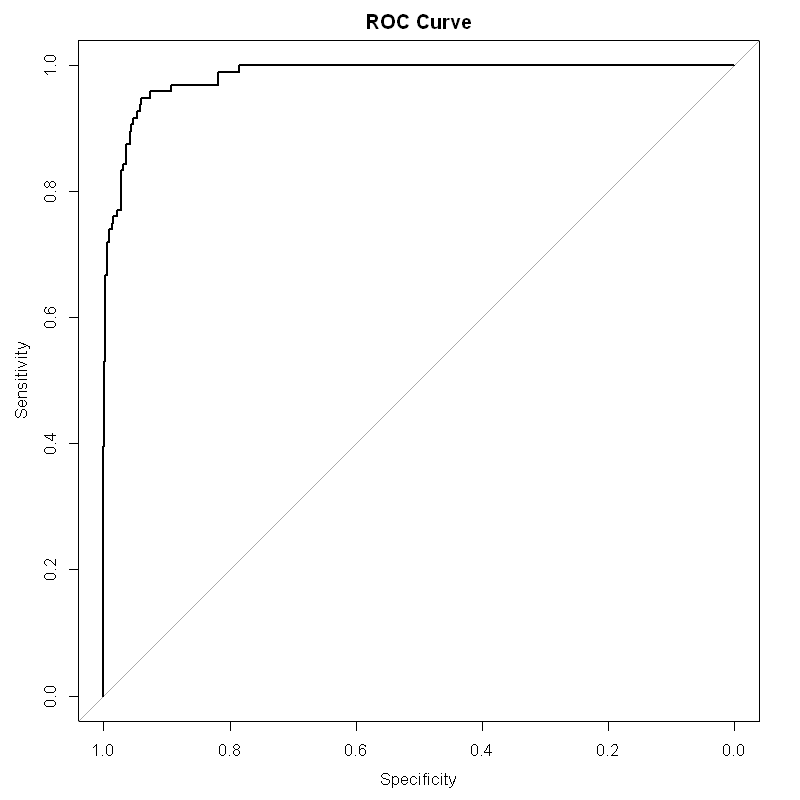

In [35]:
# Evaluate the first Logistic Regression model
# and print out the results
print('First Logistic Regression Model')
evaluation(test$GoodGrades, predict(log1, test, type = 'response'))

[1] "Second Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  575   6
      Yes  41  90

Accuracy  = 0.9339888 
Precision = 0.6870229 
Recall    = 0.9375 
F1-score  = 0.7929515 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.981737 
------------------------------------------------------------

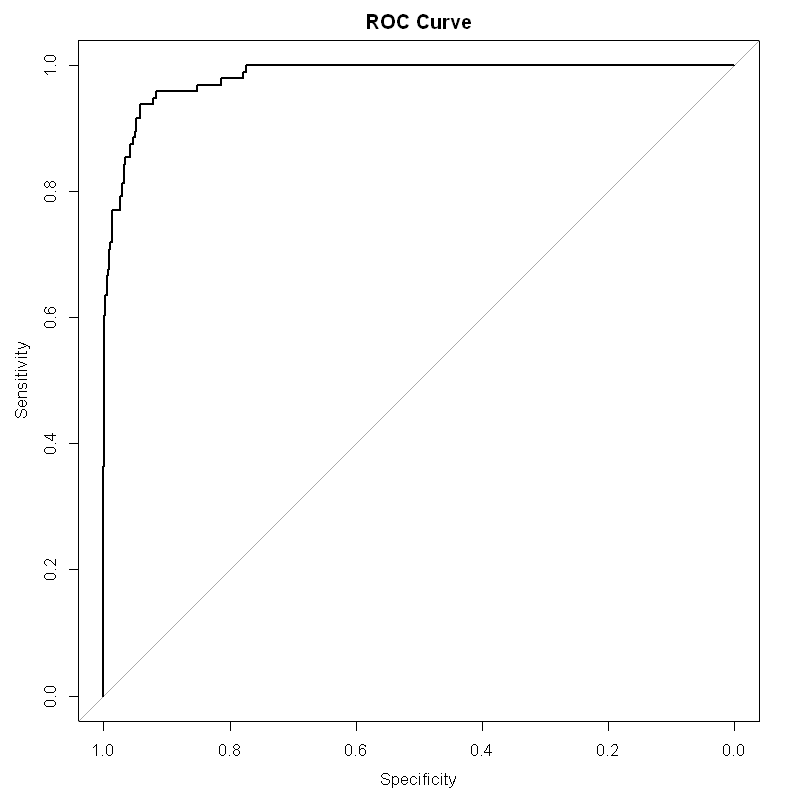

In [36]:
# Evaluate the second Logistic Regression model
# and print out the results
print('Second Logistic Regression Model')
evaluation(test$GoodGrades, predict(log2, test, type = 'response'))

[1] "Third Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  573   6
      Yes  43  90

Accuracy  = 0.9311798 
Precision = 0.6766917 
Recall    = 0.9375 
F1-score  = 0.7860262 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9828193 
------------------------------------------------------------

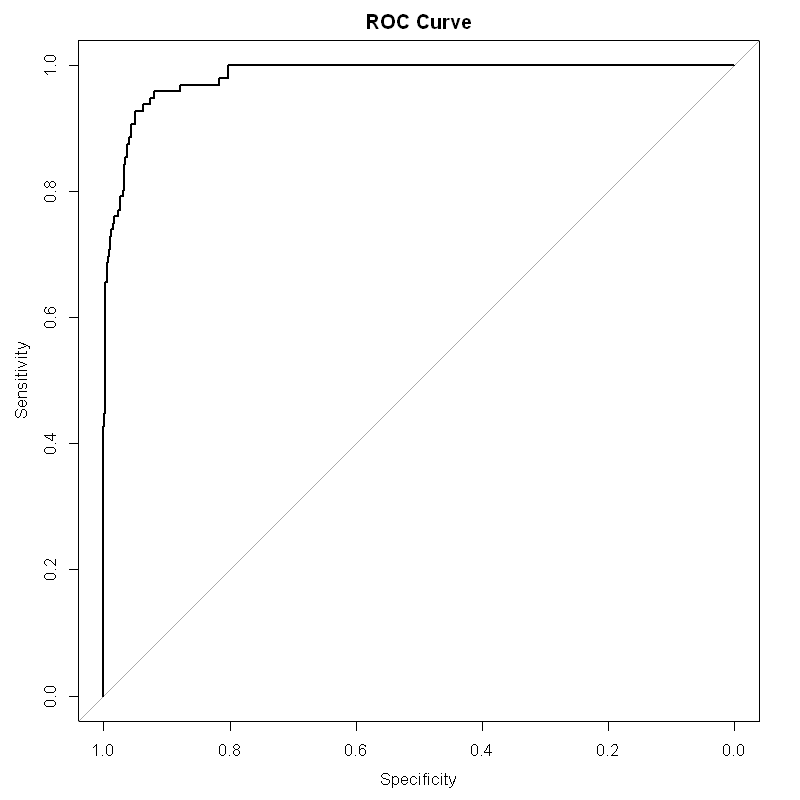

In [37]:
# Evaluate the third Logistic Regression model
# and print out the results
print('Third Logistic Regression Model')
evaluation(test$GoodGrades, predict(log3, test, type = 'response'))

**Summary of Evaluation Metrics from Logistic Regression Models**

|          |  log1  |  log2  |  log3  |
|--------- | ------ | ------ | ------ |
|Accuracy  | 0.9354 | 0.9340 | 0.9311 |
|Precision | 0.6894 | 0.6870 | 0.6767 |
|Recall    | 0.9479 | 0.9375 | 0.9375 |
|F1 Score  | 0.7982 | 0.7929 | 0.7860 |
|AUC-ROC   | 0.9837 | 0.9817 | 0.9828 |

**Observations:**
- From the summary, it can be concluded that the **first Logistic Regression model** (use each extracurricular activity as an individual predictor) has the overall best performance. Thus, this suggests that using the actitivies as individual predictor is slightly better than using the number of activities joined, and the interaction between those activities are not significant enough to affect the output. However, the differences between the three models are not substansial.
- Notably, the Precision is significantly lower than the Recall, which results in a moderate F1 Score despite the high Accuracy. This suggests that while the model is **better at identifying the negative labels**, it **struggles with positive predictors** as many of the predicted positive labels are incorrect.
- In addition, even though the F1 score is not particularly high, the AUC-ROC score is notably high (approaching 1), indicating the model actually has a **strong ability to distinguish between the classes** overall. This suggests that while the model is effective, the selected threshold value may not be optimal. Therefore, we need to try different threshold values to improve the model.

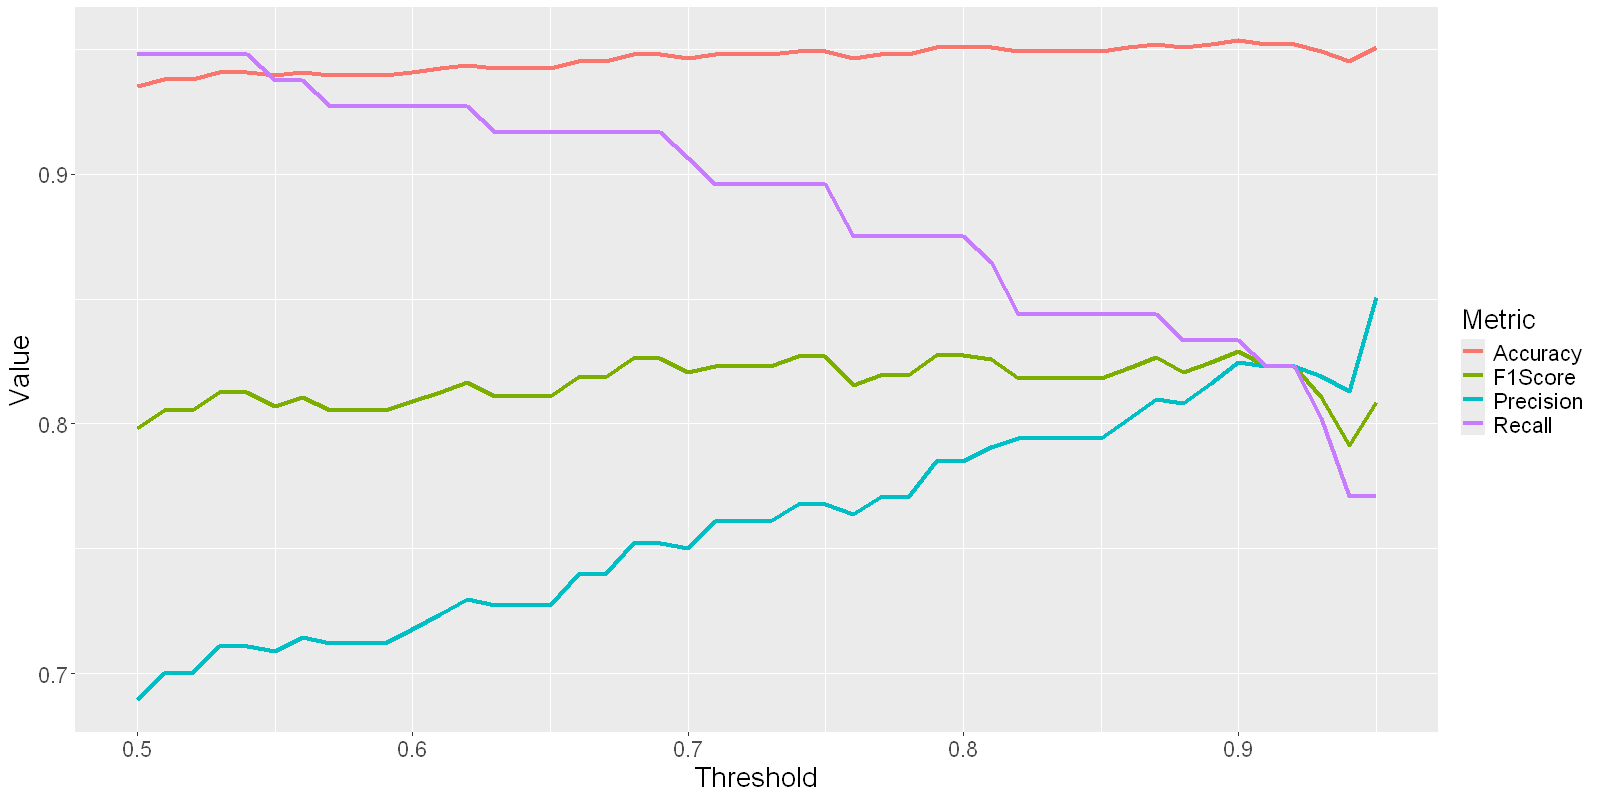

In [38]:
# Create an empty dataframe to save the results
threshold_eval <- data.frame(Threshold = double(),
                             Accuracy = double(),
                             Precision = double(),
                             Recall = double(),
                             F1Score = double())

# Here we will use the first Logistic Regression model for the experiment
# Therefore, we need to collect the probability results from the model
probs <- predict(log1, test, type = 'response')

# Try different threshold values
for (x in seq(0.5, 0.95, 0.01)) {
    # Predict the label based on the probability
    preds <- factor(probs >= x, 
                    levels = c(FALSE, TRUE),
                    labels = c('No', 'Yes'))

    # Create the confusion matrix
    cm <- table(preds, test$GoodGrades)

    # Calculate the evaluation metrics
    accuracy <- (cm[1,1] + cm[2,2])/(cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2])
    precision <- cm[2,2]/(cm[2,2] + cm[2,1])
    recall <- cm[2,2]/(cm[2,2] + cm[1,2])
    f1 <- cm[2,2]/(cm[2,2] + 0.5*(cm[2,1] + cm[1,2]))

    # Save the results
    threshold_eval[nrow(threshold_eval)+1, ] <- c(x, accuracy, precision, recall, f1)
}

# Adjust the size for the plot
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 100)

# Visualise the experiment results
threshold_eval %>%
    pivot_longer(-Threshold, names_to = 'Metric', values_to = 'Value') %>%
    ggplot(aes(x = Threshold, y = Value, color = Metric)) +
        geom_line(lwd = 1.5) +
        theme(text = element_text(size = 20))

**Observations:**
- From the chart above, overall, with larger threshold value, the Accuracy and the F1 Score tend to increase also. This means that the model is actually **more selective in predicting the positive class** ("Yes").
- Interstingly, while the Precision score also rises, the Recall score declines instead. This happen because of the **Precision-Recall trade-off**. Therefore, we need to choose an optimal value so that Precision is relatively high, but Recall is not too low.
- The **chosen optimal threshold value** is **0.9**, and this value will be used for further analysis.

##### 5.1.1.3. Model Re-Evaluation Results

After choosing a new optimal threshold value, we need to re-evaluate the models again.

[1] "First Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  599  16
      Yes  17  80

Accuracy  = 0.9536517 
Precision = 0.8247423 
Recall    = 0.8333333 
F1-score  = 0.8290155 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9837324 
------------------------------------------------------------

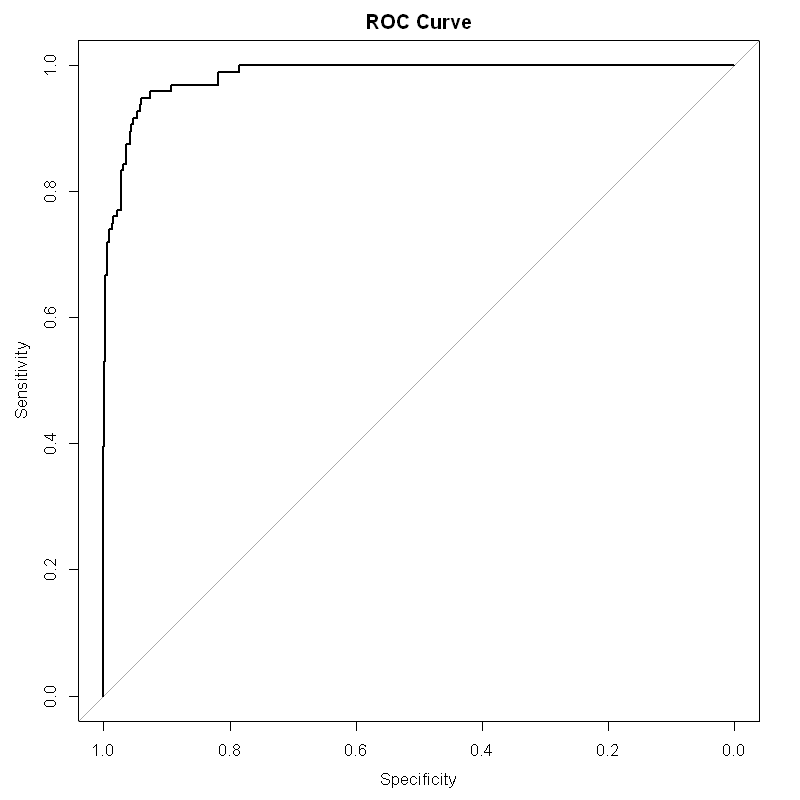

In [39]:
# Re-valuate the first Logistic Regression model
# and print out the results
print('First Logistic Regression Model')
evaluation(test$GoodGrades, predict(log1, test, type = 'response'), 0.90)

[1] "Second Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  597  18
      Yes  19  78

Accuracy  = 0.9480337 
Precision = 0.8041237 
Recall    = 0.8125 
F1-score  = 0.8082902 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.981737 
------------------------------------------------------------

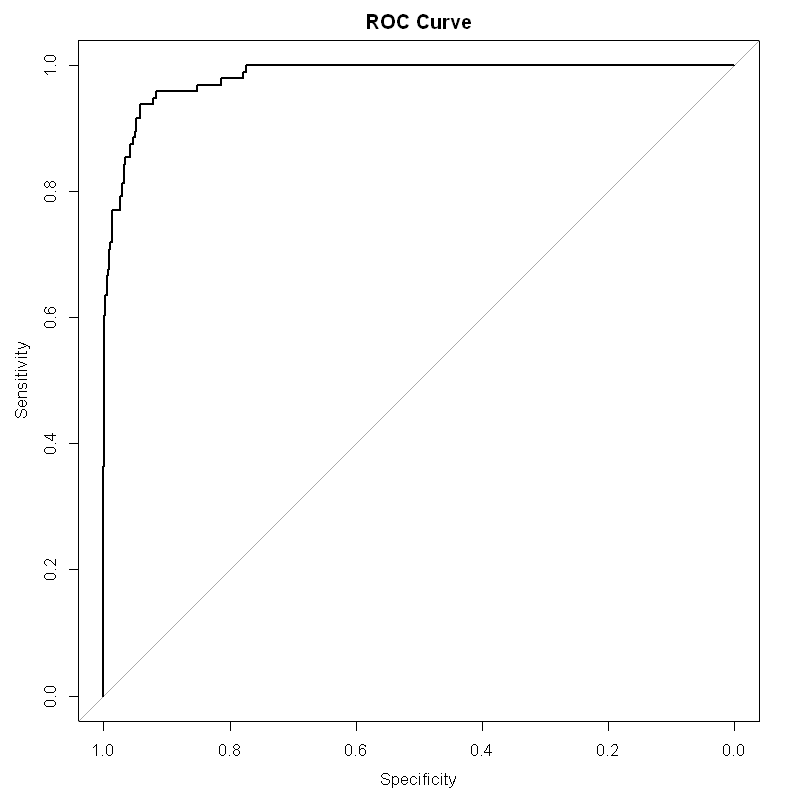

In [40]:
# Re-valuate the second Logistic Regression model
# and print out the results
print('Second Logistic Regression Model')
evaluation(test$GoodGrades, predict(log2, test, type = 'response'), 0.90)

[1] "Third Logistic Regression Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  598  20
      Yes  18  76

Accuracy  = 0.9466292 
Precision = 0.8085106 
Recall    = 0.7916667 
F1-score  = 0.8 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9828193 
------------------------------------------------------------

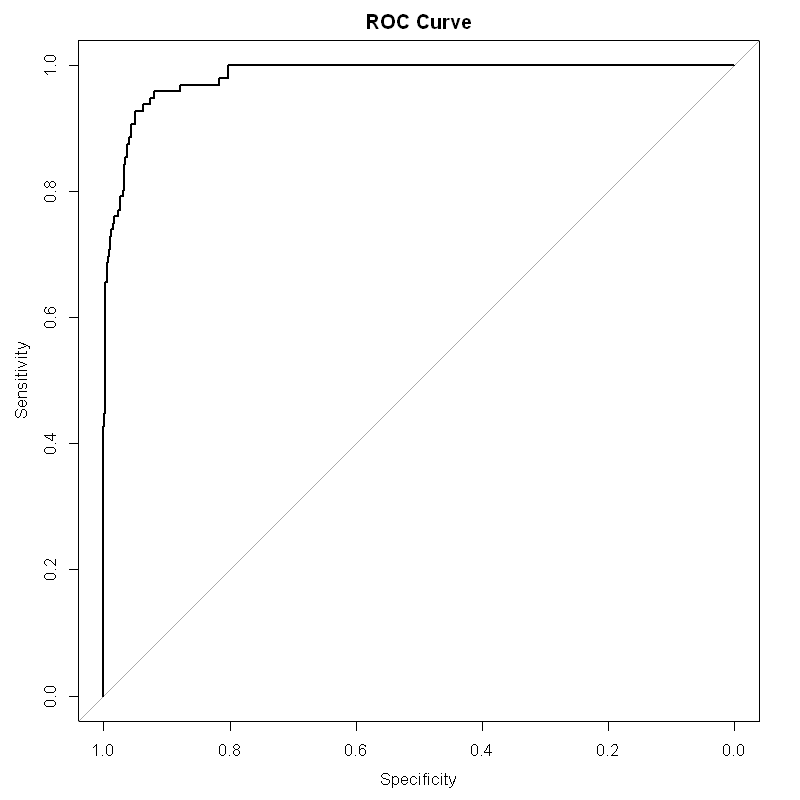

In [41]:
# Re-valuate the third Logistic Regression model
# and print out the results
print('Third Logistic Regression Model')
evaluation(test$GoodGrades, predict(log3, test, type = 'response'), 0.90)

**Summary of Re-Evaluation Metrics from Logistic Regression Models**

|          |  log1  |  log2  |  log3  |
|--------- | ------ | ------ | ------ |
|Accuracy  | 0.9536 | 0.9480 | 0.9466 |
|Precision | 0.8247 | 0.8041 | 0.8085 |
|Recall    | 0.8333 | 0.8125 | 0.7917 |
|F1 Score  | 0.8290 | 0.8083 | 0.8000 |
|AUC-ROC   | 0.9837 | 0.9817 | 0.9828 |

**Observations:**
- From the summary, it can be seen that there are **some improvements in the Accuracy, Precision, and F1 Score** of the models after changing the threshold value. Note that the Recall score decreases due to the Precision-Recall trade-off.
- Overall, the comparison is still the same as the **first Logistic Regression model** has the best performance.

#### 5.1.2. Linear Discriminant Analysis (LDA)

##### 5.1.2.1. Model Summary

Call:
lda(GoodGrades ~ . - NoOfActivities, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    ExtracurricularYes SportsYes  MusicYes
No           0.3662265 0.2988186 0.1869354
Yes          0.4016678 0.3523280 0.2682418

Coefficients of linear discriminants:
                                 LD1
StudyTimeWeekly           0.06199651
Absences                 -0.17786078
TutoringYes               0.57822404
ParentalSupportLow        0.54382147
ParentalSupportModerate   0.95502357
ParentalSupportHigh       1.16559964
ParentalSupportVery High  1.14244213
Extracurricul

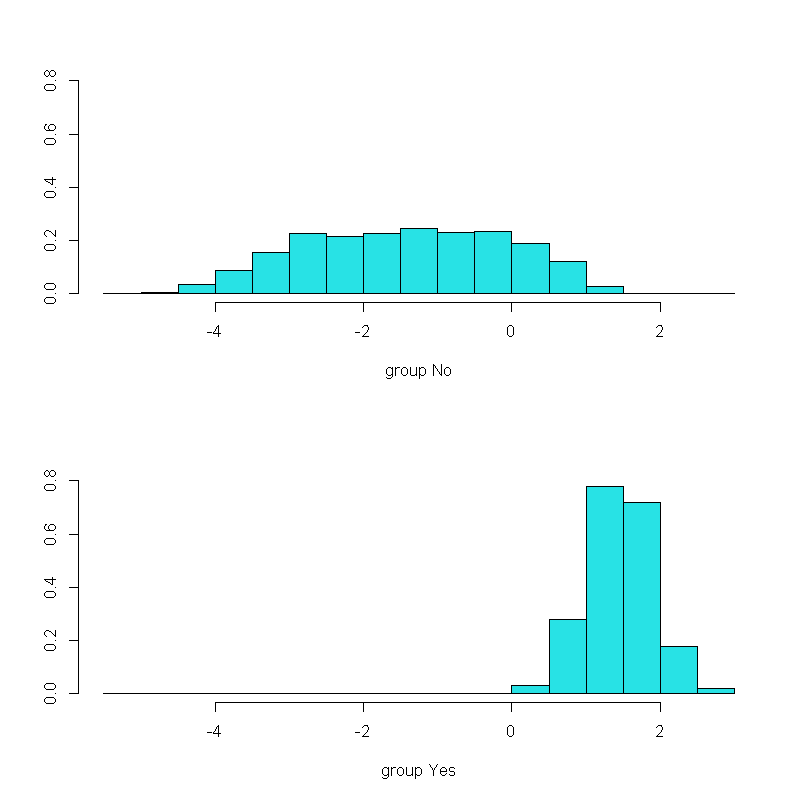

In [42]:
# Print out the summary of the first LDA model
lda1

# Plot each class' distribution
plot(lda1)

**Observation:**
- The coefficients show that out of all the predictors, **only `Absences` has a negative relationship** with the output. This also aligns with the previous analysis.
- From the distribution, it can be seen that there is **a little overlap** between the tail end of the "No" class with the "Yes" class. This may indicate that the model **cannot fully distinguishing the labels**, potentially leading to not a flawless result.

Call:
lda(GoodGrades ~ . - NoOfActivities + Extracurricular * Sports * 
    Music, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    ExtracurricularYes SportsYes  MusicYes ExtracurricularYes:SportsYes
No           0.3662265 0.2988186 0.1869354                    0.1063238
Yes          0.4016678 0.3523280 0.2682418                    0.1000695
    ExtracurricularYes:MusicYes SportsYes:MusicYes
No                   0.07435719         0.05628909
Yes                  0.07644197         0.09451008
    ExtracurricularYes:SportsYes:MusicYes
No                        

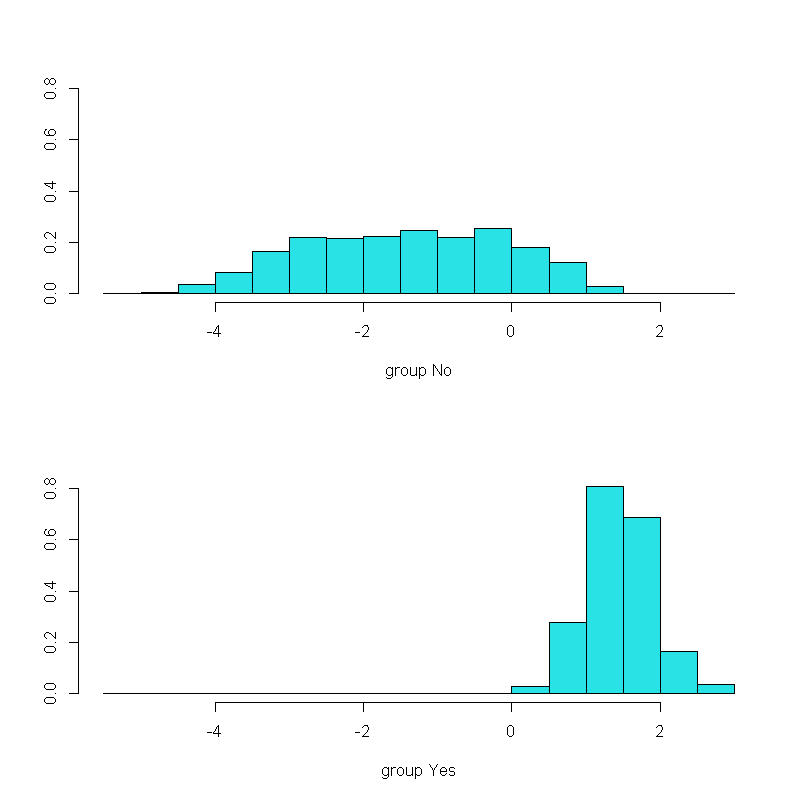

In [43]:
# Print out the summary of the first LDA model
lda2

# Plot each class' distribution
plot(lda2)

**Observation:**
- Other than `Absences`, **all interaction predictors exhibit a negative relationship** with the output. This indicates that engaging in two or more activities may negatively impact on a student's academic performance.
- From the distribution, it is apparent that **there is also a little overlap**, thus potentially reducing the performance score.

Call:
lda(GoodGrades ~ . - Extracurricular - Sports - Music, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    NoOfActivities
No       0.8519805
Yes      1.0222377

Coefficients of linear discriminants:
                                 LD1
StudyTimeWeekly           0.06175986
Absences                 -0.17783238
TutoringYes               0.57550761
ParentalSupportLow        0.54592792
ParentalSupportModerate   0.96215848
ParentalSupportHigh       1.16678274
ParentalSupportVery High  1.15287853
NoOfActivities            0.31257632

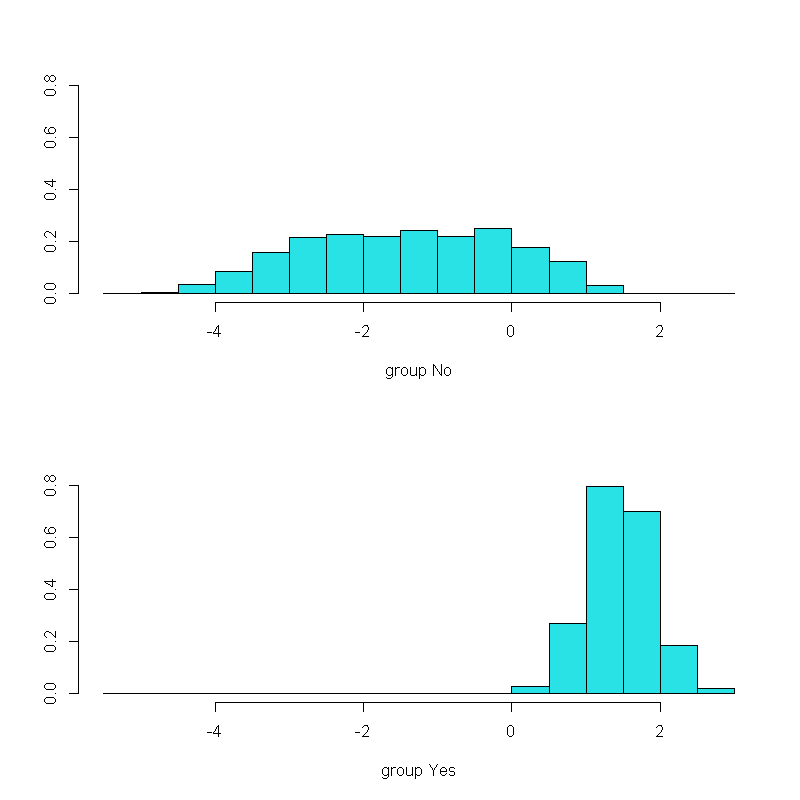

In [44]:
# Print out the summary of the third LDA model
lda3

# Plot each class' distribution
plot(lda3)

**Observation:**
- There are no other predictors aside from `Absences` that has a negative relationship with the output.
- From the distribution, it is apparent that **there is also a little overlap**, thus potentially reducing the performance score.

##### 5.1.2.2. Evaluation Results

[1] "The First LDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  583   8
      Yes  33  88

Accuracy  = 0.9424157 
Precision = 0.7272727 
Recall    = 0.9166667 
F1-score  = 0.8110599 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9802658 
------------------------------------------------------------

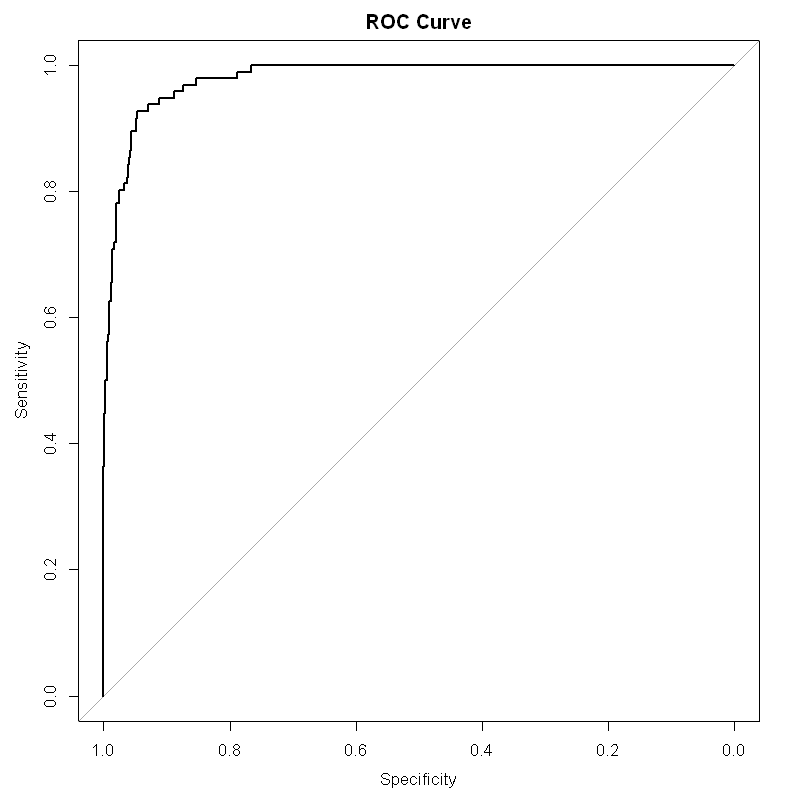

In [45]:
# Evaluate the first LDA model and print out the results
print('The First LDA Model')
evaluation(test$GoodGrades, predict(lda1, test)$posterior[, 'Yes'], 0.9)

[1] "The Second LDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  583  11
      Yes  33  85

Accuracy  = 0.9382022 
Precision = 0.720339 
Recall    = 0.8854167 
F1-score  = 0.7943925 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.978913 
------------------------------------------------------------

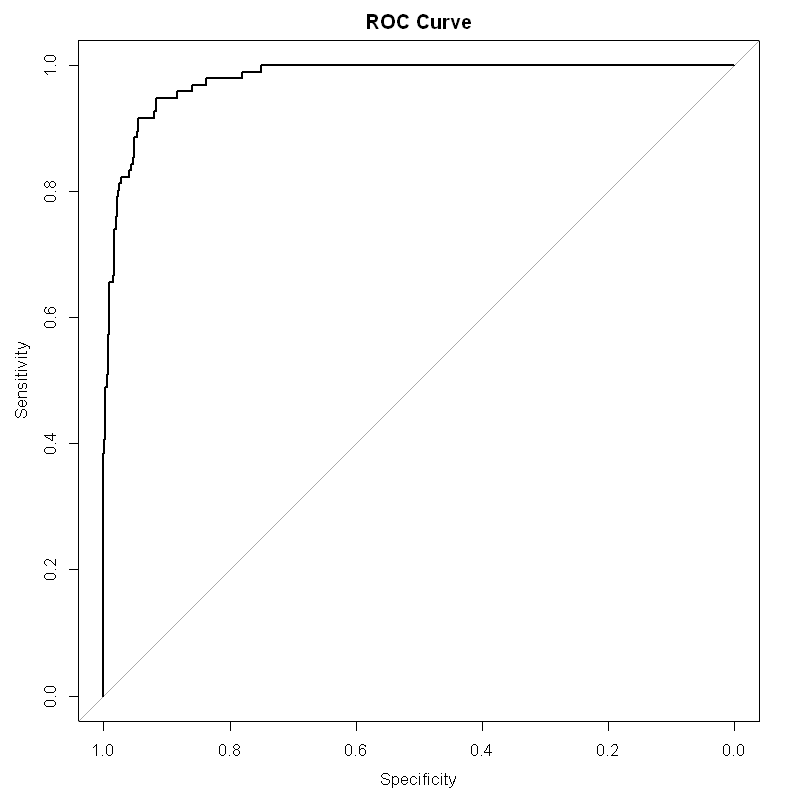

In [46]:
# Evaluate the second LDA model and print out the results
print('The Second LDA Model')
evaluation(test$GoodGrades, predict(lda2, test)$posterior[, 'Yes'], 0.9)

[1] "The Third LDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  582   8
      Yes  34  88

Accuracy  = 0.9410112 
Precision = 0.7213115 
Recall    = 0.9166667 
F1-score  = 0.8073394 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9809084 
------------------------------------------------------------

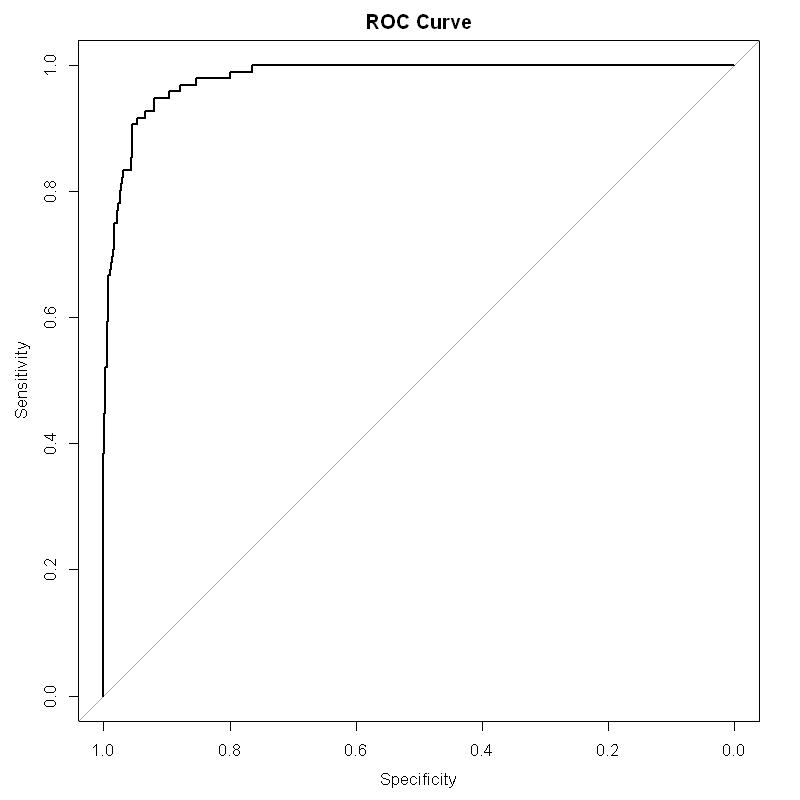

In [47]:
# Evaluate the third LDA model and print out the results
print('The Third LDA Model')
evaluation(test$GoodGrades, predict(lda3, test)$posterior[, 'Yes'], 0.9)

**Summary of Evaluation Metrics from Linear Discriminant Analysis (LDA) Models**

|          |  lda1  |  lda2  |  lda3  |
|--------- | ------ | ------ | ------ |
|Accuracy  | 0.9424 | 0.9382 | 0.9410 |
|Precision | 0.7272 | 0.7203 | 0.7213 |
|Recall    | 0.9167 | 0.8854 | 0.9167 |
|F1 Score  | 0.8110 | 0.7944 | 0.8073 |
|AUC-ROC   | 0.9803 | 0.9789 | 0.9809 |

**Observations:**
- From the summary above, overall, it is evident that **both the first models show the best performance**. Therefore, for the LDA model, it is also best to use the extracurricular activities as individual predictors, while adding interaction terms or using an aggregate of number of activities do not improve the model's performance.
- Note that the overall performance is slighly lower than the Logistic Regression. This might happen because overlap between the positive class distribution and the tail end of the negative class distribution may leads to the models **struggling to correctly distinguish the positive class** when the data is located **around the overlap**.

#### 5.1.3. Quadratic Discriminant Analysis (QDA)

##### 5.1.3.1. Model Summary

In [48]:
# Print out the first QDA model summary
qda1

Call:
qda(GoodGrades ~ . - NoOfActivities, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    ExtracurricularYes SportsYes  MusicYes
No           0.3662265 0.2988186 0.1869354
Yes          0.4016678 0.3523280 0.2682418

In [49]:
# Print out the second QDA model summary
qda2

Call:
qda(GoodGrades ~ . - NoOfActivities + Extracurricular * Sports * 
    Music, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    ExtracurricularYes SportsYes  MusicYes ExtracurricularYes:SportsYes
No           0.3662265 0.2988186 0.1869354                    0.1063238
Yes          0.4016678 0.3523280 0.2682418                    0.1000695
    ExtracurricularYes:MusicYes SportsYes:MusicYes
No                   0.07435719         0.05628909
Yes                  0.07644197         0.09451008
    ExtracurricularYes:SportsYes:MusicYes
No                        

In [50]:
# Print out the third QDA model summary
qda3

Call:
qda(GoodGrades ~ . - Extracurricular - Sports - Music, data = train)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    StudyTimeWeekly  Absences TutoringYes ParentalSupportLow
No         9.473919 16.370396   0.2772759          0.2230716
Yes       11.810039  2.773818   0.4656011          0.1139680
    ParentalSupportModerate ParentalSupportHigh ParentalSupportVery High
No                0.3175817           0.2772759               0.09034051
Yes               0.3537179           0.3898541               0.13203614
    NoOfActivities
No       0.8519805
Yes      1.0222377

##### 5.1.3.2. Evaluation Results

[1] "The First QDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  591  16
      Yes  25  80

Accuracy  = 0.9424157 
Precision = 0.7619048 
Recall    = 0.8333333 
F1-score  = 0.7960199 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9550358 
------------------------------------------------------------

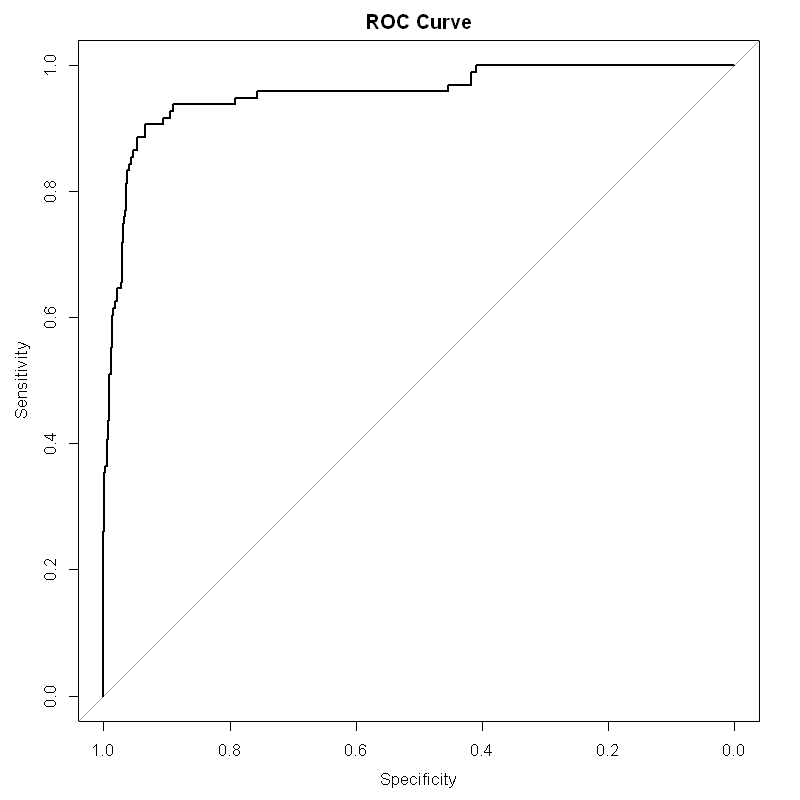

In [51]:
# Evaluate the first QDA model and print out the results
print('The First QDA Model')
evaluation(test$GoodGrades, predict(qda1, test)$posterior[, 'Yes'], 0.9)

[1] "The Second QDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  586  21
      Yes  30  75

Accuracy  = 0.9283708 
Precision = 0.7142857 
Recall    = 0.78125 
F1-score  = 0.7462687 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9391741 
------------------------------------------------------------

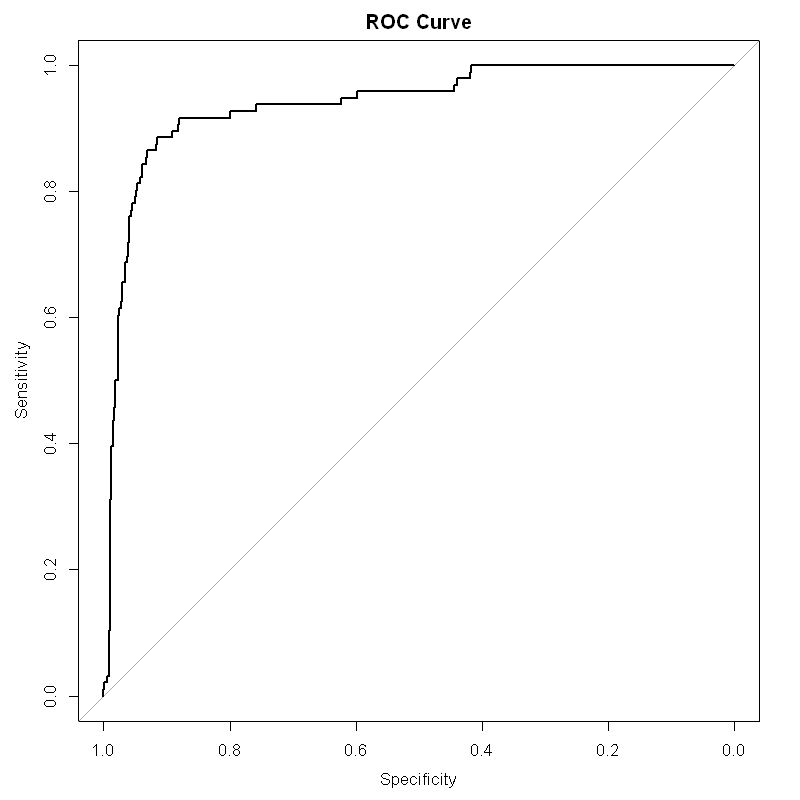

In [52]:
# Evaluate the second QDA model and print out the results
print('The Second QDA Model')
evaluation(test$GoodGrades, predict(qda2, test)$posterior[, 'Yes'], 0.9)

[1] "The Third QDA Model"
------------------------------------------------------------
Performance statistics:

Confusion matrix:

         actual
predicted  No Yes
      No  590  18
      Yes  26  78

Accuracy  = 0.9382022 
Precision = 0.75 
Recall    = 0.8125 
F1-score  = 0.78 



Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC = 0.9567269 
------------------------------------------------------------

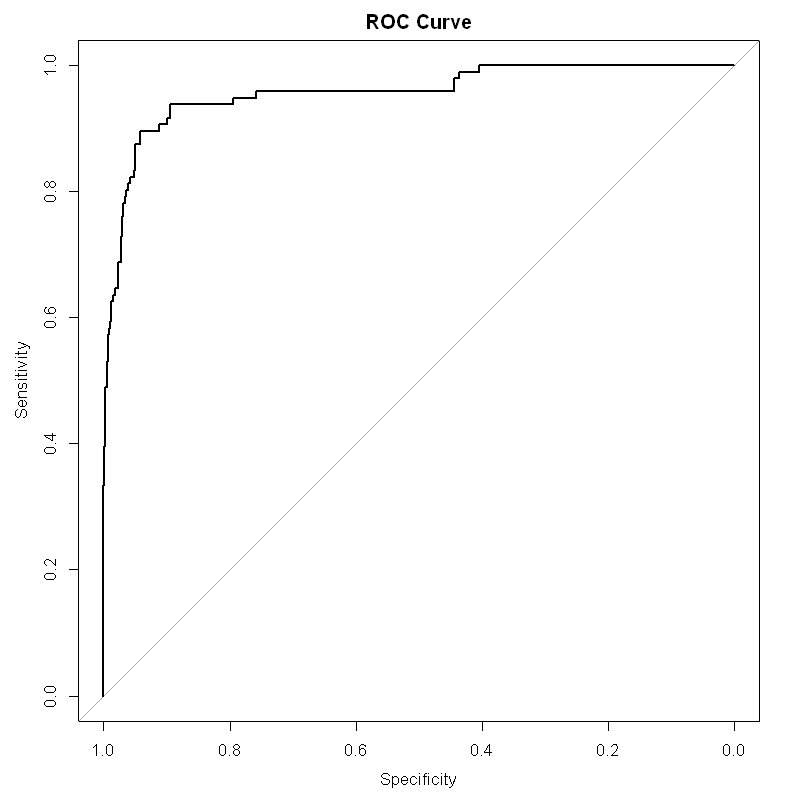

In [53]:
# Evaluate the third QDA model and print out the results
print('The Third QDA Model')
evaluation(test$GoodGrades, predict(qda3, test)$posterior[, 'Yes'], 0.9)

**Summary of All Evaluation Metrics from Quadratic Discriminant Analysis (QDA) Models**

|          |  qda1  |  qda2  |  qda3  |
|--------- | ------ | ------ | ------ |
|Accuracy  | 0.9424 | 0.9284 | 0.9382 |
|Precision | 0.7619 | 0.7143 | 0.7500 |
|Recall    | 0.8333 | 0.7812 | 0.8125 |
|F1 Score  | 0.7960 | 0.7463 | 0.7800 |
|AUC-ROC   | 0.9550 | 0.9392 | 0.9567 |

**Observations:**
- From the summary above, overall, **the first model exhibit the best performance**. This suggests that, for the QDA model, using the extracurricular activities as individual predictors gives a slightly better results.
- Interestingly, the overall performance of the QDA models is also slightly lower than the LDA models. This might happen because the QDA models are **more complex** than the LDA models, potentially leading to an **overfitting** case.

### 5.1.4. Choosing the Best Model

**Summary of Evaluation Metrics from All Models**

|          |  log1  |  log2  |  log3  |  lda1  |  lda2  |  lda3  |  qda1  |  qda2  |  qda3  |
|--------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
|Accuracy  | 0.9536 | 0.9480 | 0.9466 | 0.9424 | 0.9382 | 0.9410 | 0.9424 | 0.9284 | 0.9382 |
|Precision | 0.8247 | 0.8041 | 0.8085 | 0.7272 | 0.7203 | 0.7213 | 0.7619 | 0.7143 | 0.7500 |
|Recall    | 0.8333 | 0.8125 | 0.7917 | 0.9896 | 0.9167 | 0.8854 | 0.9167 | 0.7812 | 0.8125 |
|F1 Score  | 0.8290 | 0.8083 | 0.8000 | 0.8110 | 0.7944 | 0.8073 | 0.7960 | 0.7463 | 0.7800 |
|AUC-ROC   | 0.9837 | 0.9817 | 0.9828 | 0.9803 | 0.9789 | 0.9809 | 0.9550 | 0.9392 | 0.9567 |

From the above comparison, it is clear that the best model is **the first Logistric Regression model**, in which we use the extracurricural activities as individual predictors. In this case, it can also be observed that overall, **Logistic Regression gives a slightly better results than LDA and QDA models**. This might happen because in LDA and QDA case, the distribution of the two classes of the target variable are **not completely separable**, thus making the model cannot distinguish between those two classes well.

## 5.2. Inference Task

### 5.2.1. Variance Inflation Factors (VIF)

Variance Inflation Factors (VIF) measures the **ratio of the variance** of the predictor's coefficient when **fitting the full model with if fit on its own**. The smallest possible value is 1, which indicates that there is no colinearity between the predictor with the remaining predictors. To calculate this, we can use the `vif()` function from the `car` library.

In [54]:
# Print out the VIF score for the best model
vif(log1)

,GVIF,Df,GVIF^(1/(2*Df))
StudyTimeWeekly,1.860423,1,1.363973
Absences,2.955224,1,1.719076
Tutoring,1.755282,1,1.324871
ParentalSupport,1.859430,4,1.080619
Extracurricular,1.298444,1,1.139493
Sports,1.442456,1,1.201023
Music,1.095617,1,1.046717


From the above results, it is apparent that the VIF for all predictors are **near 1**, thus there is **no evidence of colinearity** between the predictors.

### 5.2.2. Variable Importance

The next step in the inference task is to find out which predictor has the **greatest influence on the prediction outcome** from the best model.

In R, we can just simply print out the variable importance using `varImp()` function from the `caret` library.

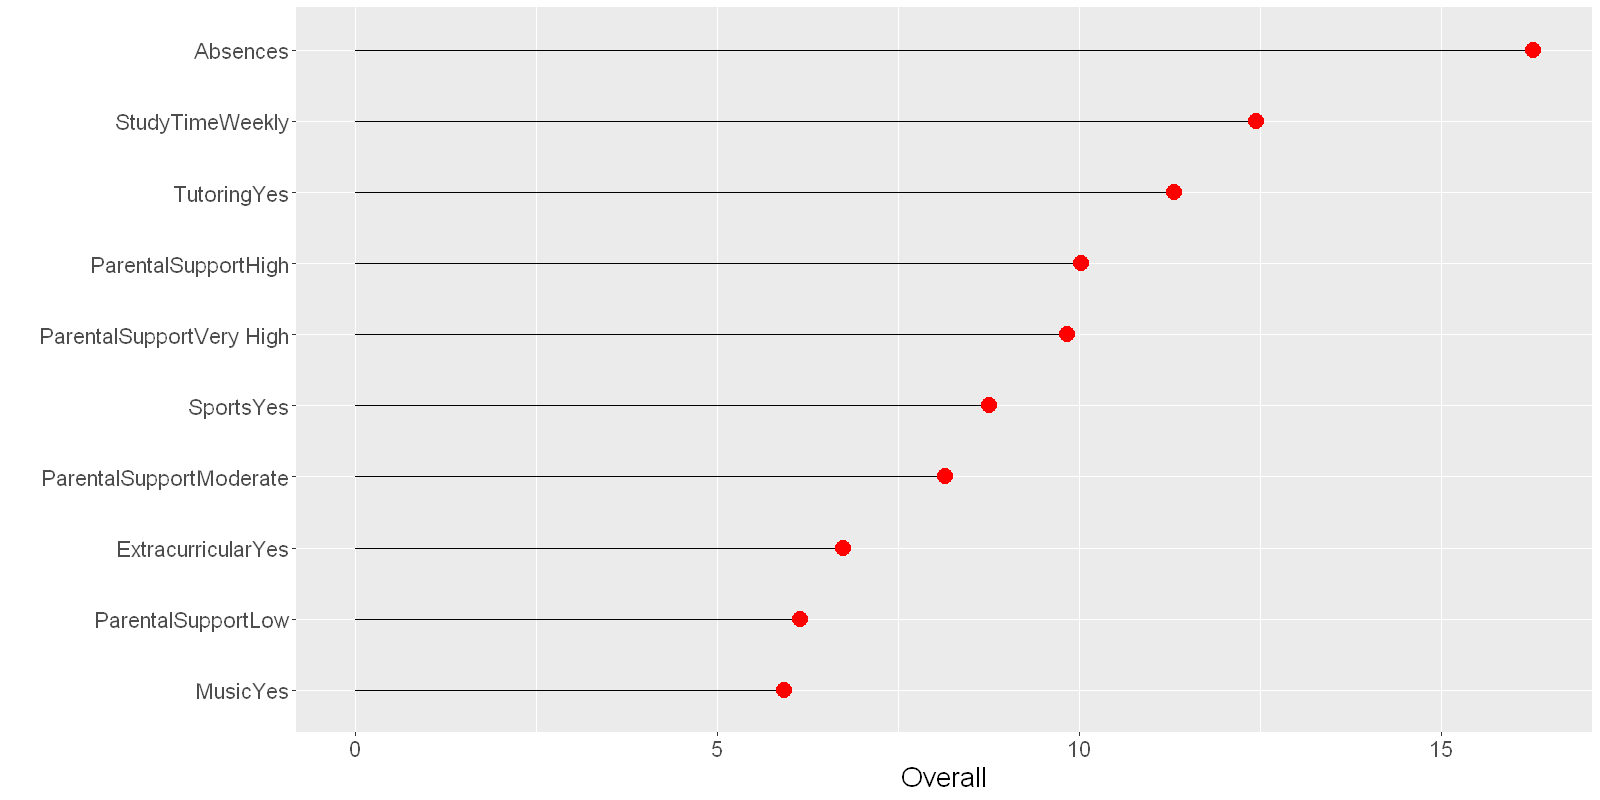

In [55]:
# Adjust the size of the figure
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 100)

# Check the variable importance in the best model
# Then, use visualisation (in this case a lollipop chart) to help the analysis
varImp(log1) %>%
  arrange(Overall) %>%
  mutate(Name = factor(rownames(.), levels = rownames(.))) %>%
  ggplot(aes(x = Name, y = Overall)) +
    geom_segment(aes(xend = Name, yend = 0)) +
    geom_point(size = 5, color="red") +
    coord_flip() +
    xlab("") +
    theme(text = element_text(size = 20))

From the above chart, it can be seen that the **top 3 factors** that may influence a student's academic performance are: **`Absences` (leading with a large margin), `StudyTimeWeekly`, and `Tutoring`**.

This result may occur because:
- **`Absences`:** frequent absences can create **gaps in knowledge and understanding** that severely affecting their grades. In addition, a high number of absences may also indicate a lack of commitment of the student to study, as student who miss classes regularly may not be serious about their academic life.
- **`StudyTimeWeekly`:** the ammount of time a student spends for studying is of course directly correlated with their academic performance. **More time to study typically allow for better preparation and understanding** on the course material, which can lead to improved grades. Moreover, it can also be used as a measurement for how serious they are about their study.
- **`Tutoring`:** having a tutor can **sigificantly enhance a student's study quality** by providing a personalized assistance and support. This help can lead to a better academic comprehension by addressing specific learning needs, which help **improving their comprehension**.

These factors have a significant effect on the prediction result as they can **directly influence** a student's learning process and **measure how serious** they are regarding their study and academic success.

----

## 6. Conclusion<a class="anchor" id="sec_7"></a>

The best classfication model that can be used to predict whether a student will achieve a good academic performance or not is a **Logistic Regression model**. The Logistic Regression model has better performances compared to the Discriminant Analysis models due to the distribution of the two classes have overlaps, thus making it hard to distinguish between the classes. 

The final model uses the student's study habit, parental involvement level, and what extracurricural activities are they participating in as the predictors, in which the **most important predictors** are:
- Number of absences during school year (by a large margin)
- Average time spent for studying each week
- Whether or not they have a tutor

Interestingly, all three factors are related to **the student's study habit**. Therefore, a student's study habit is really crucial to their academic results.

Lastly, the **final model** can be formulated as:
$$
Pr(GoodGrades="Yes")=-5.26+0.35*StudyTimeWeekly-1.23*Absences+3.49*Tutoring\\
+3.92*ParentalSupportLow+5.17*ParentalSupportModerate\\
+6.72*ParentalSupportHigh+8.10*ParentalSupportVeryHigh\\
+1.74*Extracurricular+2.72*Sports+1.66*Music
$$

----

## 7. References <a class="anchor" id="sec_8"></a>

- Abdulghani, A.-S. (2014, January). The Importance of Education. ResearchGate. https://www.researchgate.net/publication/260075970_The_Importance_of_Education 
- Apply SMOTENC algorithm. R. (n.d.). https://search.r-project.org/CRAN/refmans/themis/html/step_smotenc.html 
- England, G. (2019, May 22). How important are good grades to employers?. myView. https://www.myview.co.nz/how-important-are-good-grades/ 
- Huilgol, P. (2024, January 15). Accuracy vs. F1-score. Medium. https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2 
- Imbalanced dataset: Train/Test Split Before and after smote. Data Science Stack Exchange. (2021, November 24). https://datascience.stackexchange.com/questions/104428/imbalanced-dataset-train-test-split-before-and-after-smote 
- James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in Python. Springer. 
- Kharoua, R. E. (2024, June 12). 📚 students performance dataset 📚. Kaggle. https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset 
- Maklin, C. (2022, May 14). Synthetic minority over-sampling technique (smote). Medium. https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c 
- Narkhede, S. (2021, June 15). Understanding AUC - roc curve. Medium. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 
- R Lab: Logistic Regression, LDA, QDA, and KNN. RPubs. (n.d.). https://rpubs.com/uky994/600156 
- Weinstein, B. (2023, June 27). Average GPA for college: A Collegeadvisor Guide to GPA requirements. CollegeAdvisor. https://www.collegeadvisor.com/resources/average-gpa-for-college/ 